In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# Define the column names
columns = [
    "UnderwrittenCoverID", "PolicyID", "TransactionMonth", "IsVATRegistered", "Citizenship", "LegalType", 
    "Title", "Language", "Bank", "AccountType", "MaritalStatus", "Gender", "Country", "Province", "PostalCode", 
    "MainCrestaZone", "SubCrestaZone", "ItemType", "mmcode", "VehicleType", "RegistrationYear", "make", "Model", 
    "Cylinders", "cubiccapacity", "kilowatts", "bodytype", "NumberOfDoors", "VehicleIntroDate", 
    "CustomValueEstimate", "AlarmImmobiliser", "TrackingDevice", "CapitalOutstanding", "NewVehicle", "WrittenOff", 
    "Rebuilt", "Converted", "CrossBorder", "NumberOfVehiclesInFleet", "SumInsured", "TermFrequency", 
    "CalculatedPremiumPerTerm", "ExcessSelected", "CoverCategory", "CoverType", "CoverGroup", "Section", 
    "Product", "StatutoryClass", "StatutoryRiskType", "TotalPremium", "TotalClaims"
]

# Read the file directly (adjust the path as necessary)
df = pd.read_csv(r'..\MachineLearningRating.txt', sep='|', header=None, names=columns, low_memory=False)

# Print the first few rows of the DataFrame
print(df.head(1))


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   

       AccountType  ...         ExcessSelected CoverCategory   CoverType  \
0  Current account  ...  Mobility - Windscreen    Windscreen  Windscreen   

             CoverGroup              Section                          Product  \
0  Comprehensive - Taxi  Motor Comprehensive  Mobility Metered Taxis: Monthly   

  StatutoryClass StatutoryRiskType  TotalPremium TotalClaims  
0     Commercial     IFRS Constant     21.929825         0.0  

[1 rows x 52 columns]


In [3]:
numerical_columns = df.select_dtypes(include='number').columns

for column in numerical_columns:
    print(f"Column: {column}")
    print(f"Variance: {df[column].var()}")
    print(f"Standard Deviation: {df[column].std()}")
    print("-" * 30)


Column: UnderwrittenCoverID
Variance: 4006093530.002176
Standard Deviation: 63293.70845512353
------------------------------
Column: PolicyID
Variance: 27984507.433664136
Standard Deviation: 5290.038509657953
------------------------------
Column: PostalCode
Variance: 7021728.411923337
Standard Deviation: 2649.85441334488
------------------------------
Column: mmcode
Variance: 185063519825520.2
Standard Deviation: 13603805.343561785
------------------------------
Column: RegistrationYear
Variance: 10.636674216260605
Standard Deviation: 3.261391454005576
------------------------------
Column: Cylinders
Variance: 0.08644782889593836
Standard Deviation: 0.2940201164817441
------------------------------
Column: cubiccapacity
Variance: 196072.4070399001
Standard Deviation: 442.8006402884938
------------------------------
Column: kilowatts
Variance: 376.0983649076828
Standard Deviation: 19.393255655193194
------------------------------
Column: NumberOfDoors
Variance: 0.21931840563912283
Stan

In [4]:
print(df.notnull().all())

UnderwrittenCoverID          True
PolicyID                     True
TransactionMonth             True
IsVATRegistered              True
Citizenship                  True
LegalType                    True
Title                        True
Language                     True
Bank                        False
AccountType                 False
MaritalStatus               False
Gender                      False
Country                      True
Province                     True
PostalCode                   True
MainCrestaZone               True
SubCrestaZone                True
ItemType                     True
mmcode                      False
VehicleType                 False
RegistrationYear             True
make                        False
Model                       False
Cylinders                   False
cubiccapacity               False
kilowatts                   False
bodytype                    False
NumberOfDoors               False
VehicleIntroDate            False
CustomValueEst

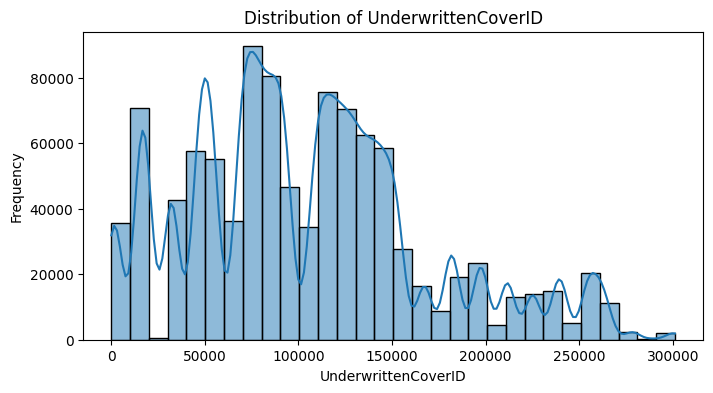

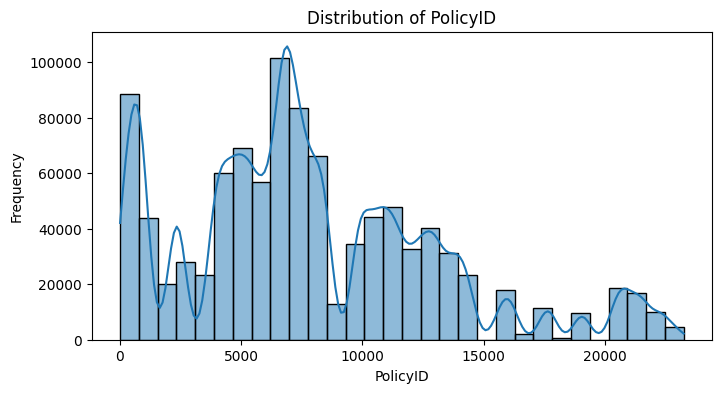

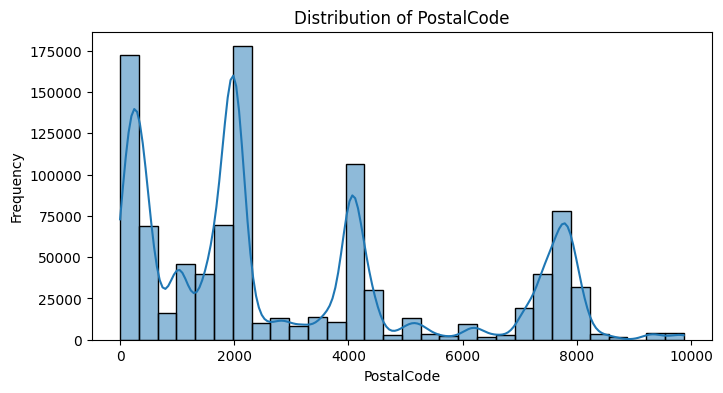

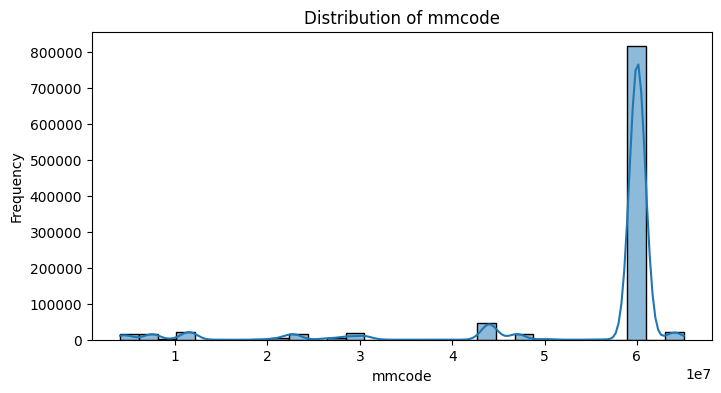

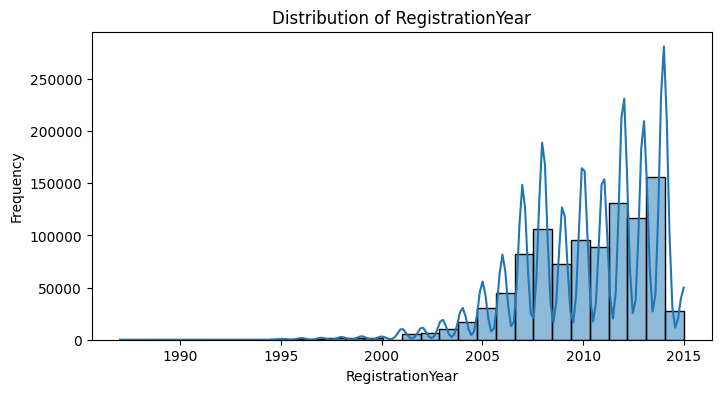

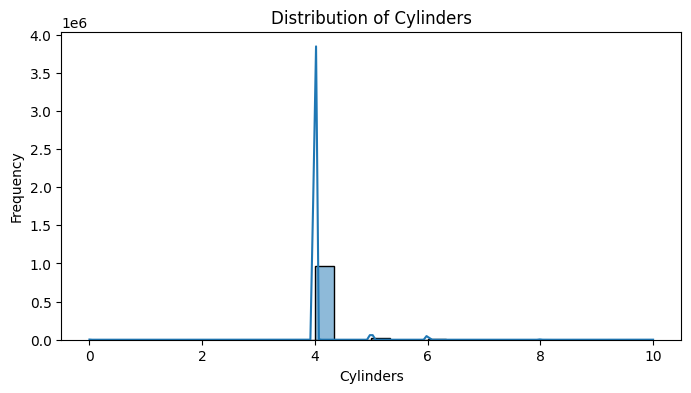

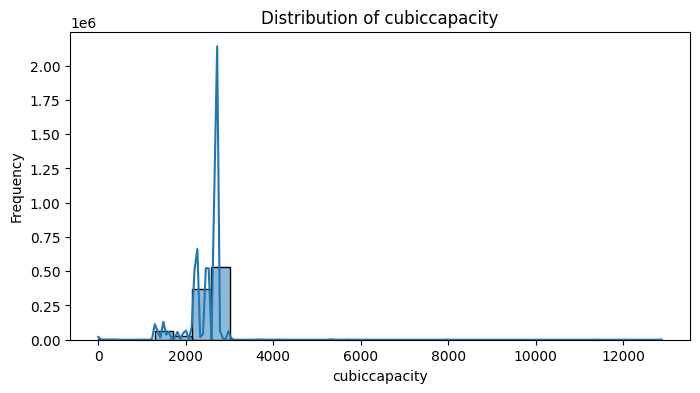

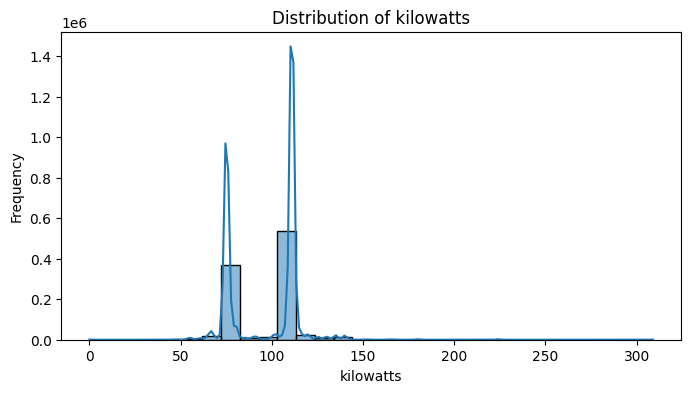

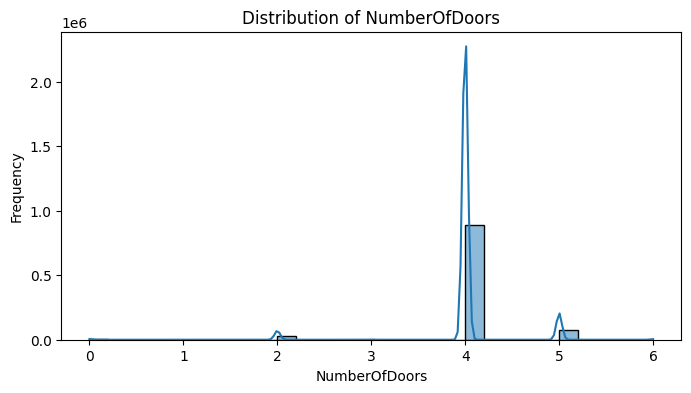

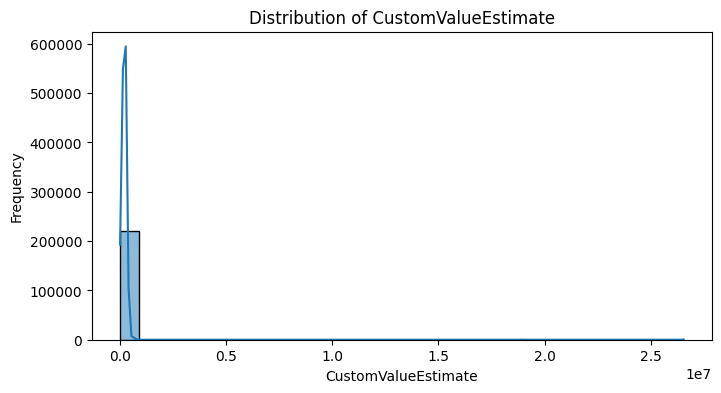

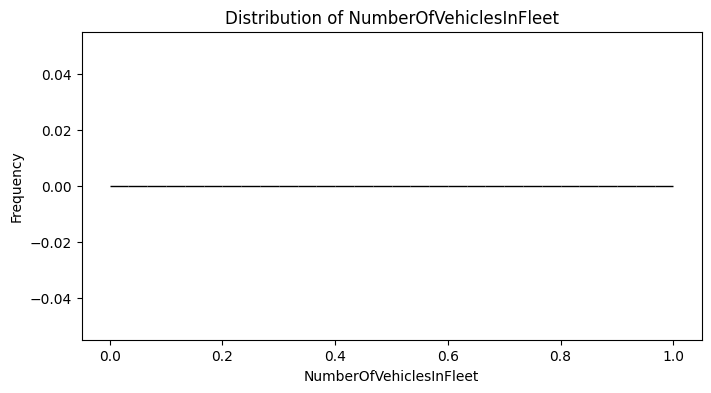

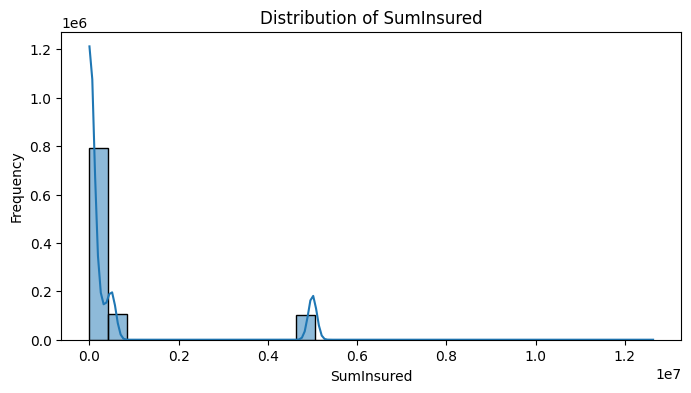

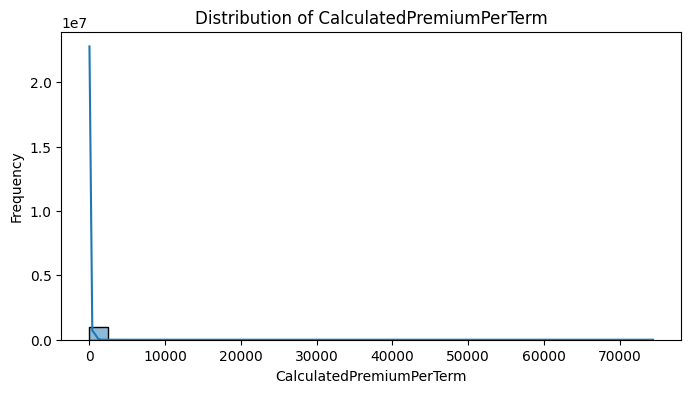

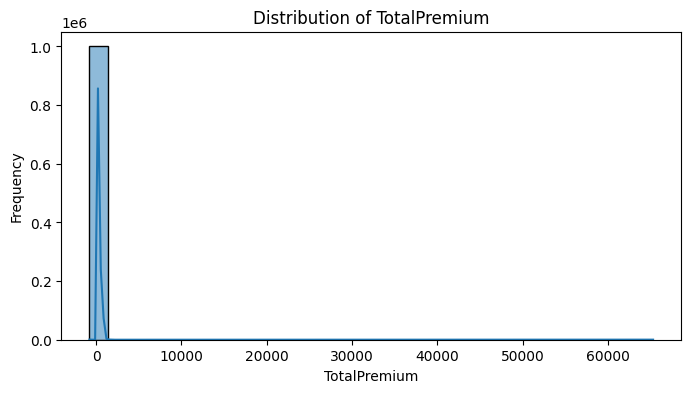

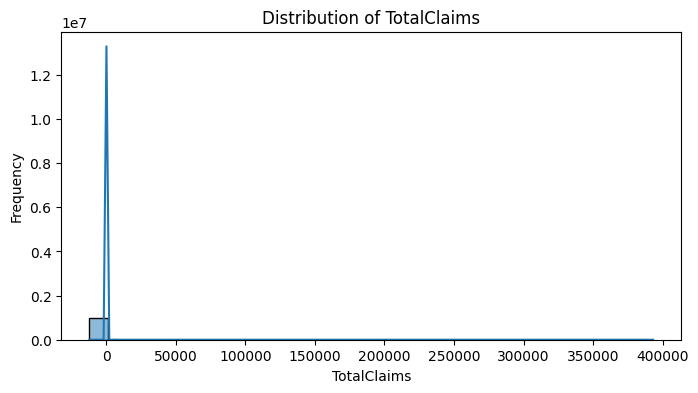

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Select numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Plot histograms for eac6/6h numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


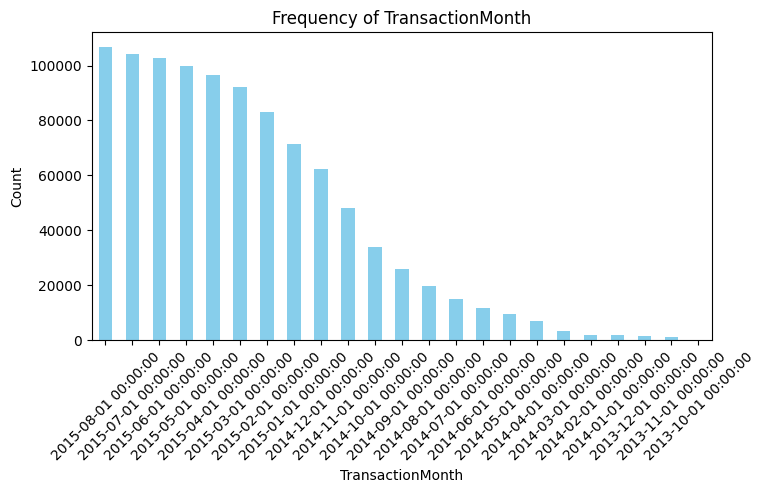

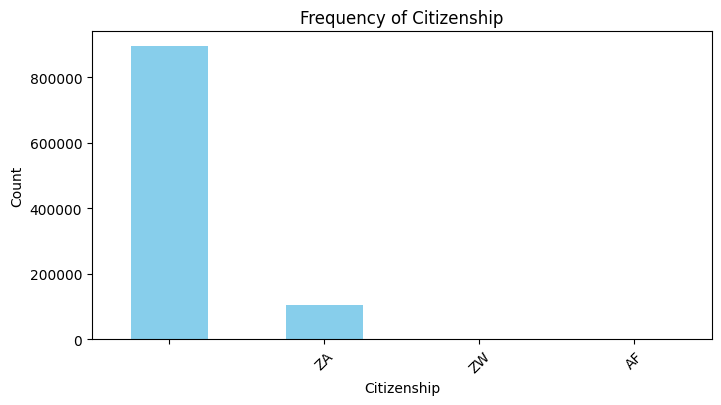

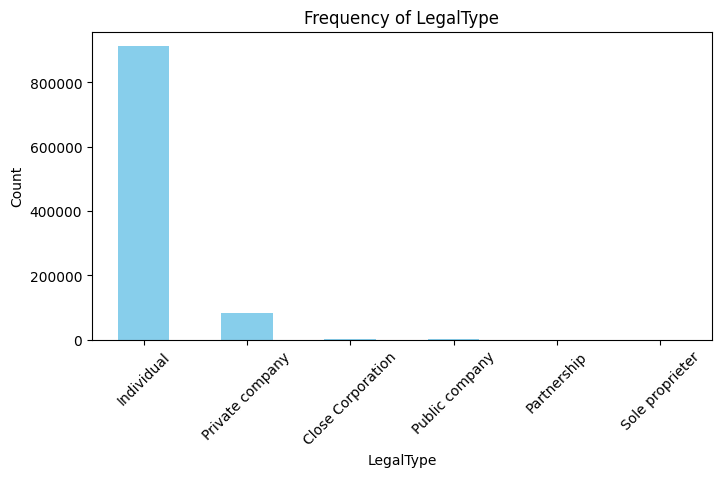

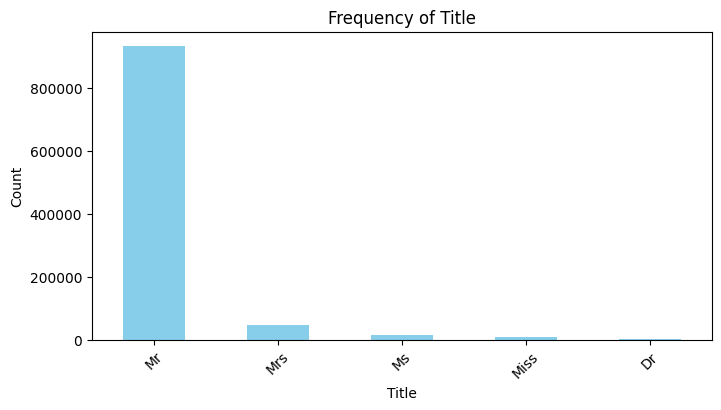

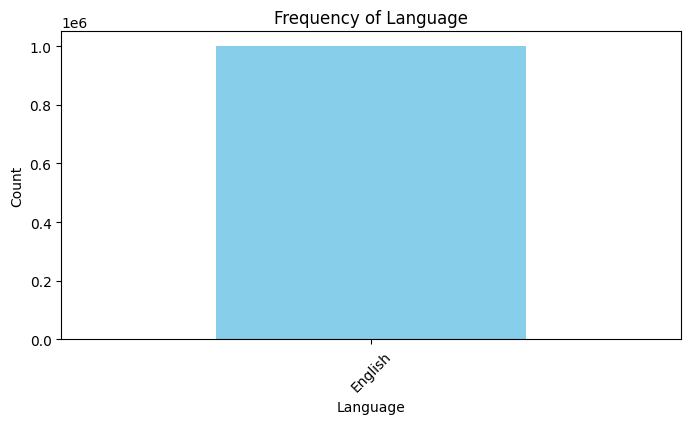

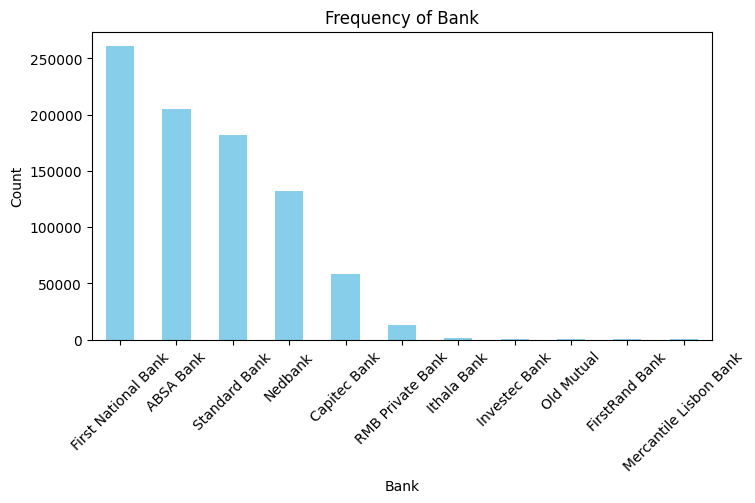

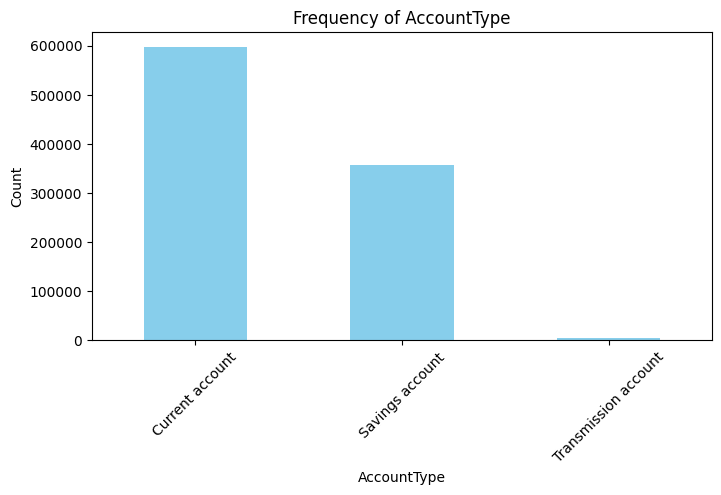

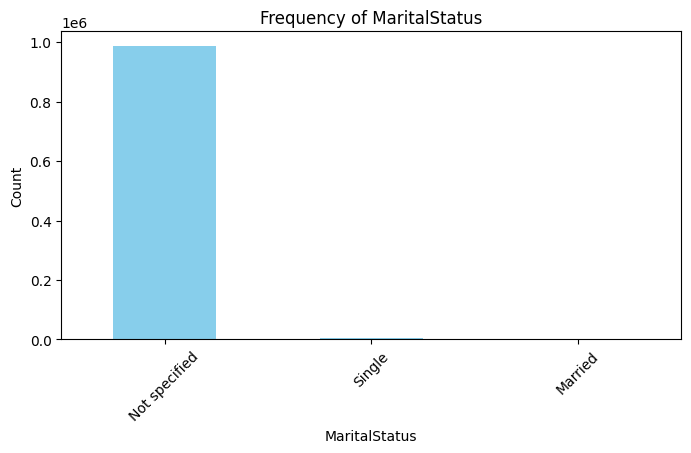

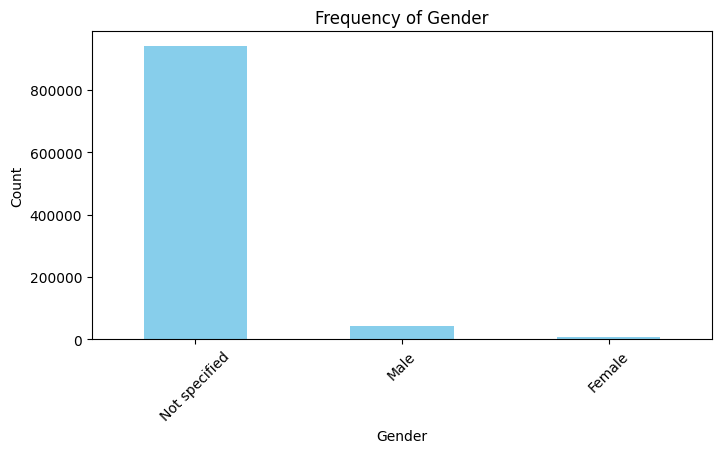

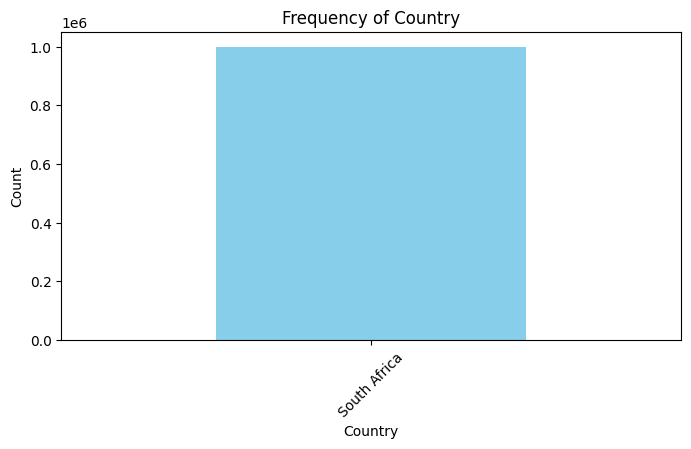

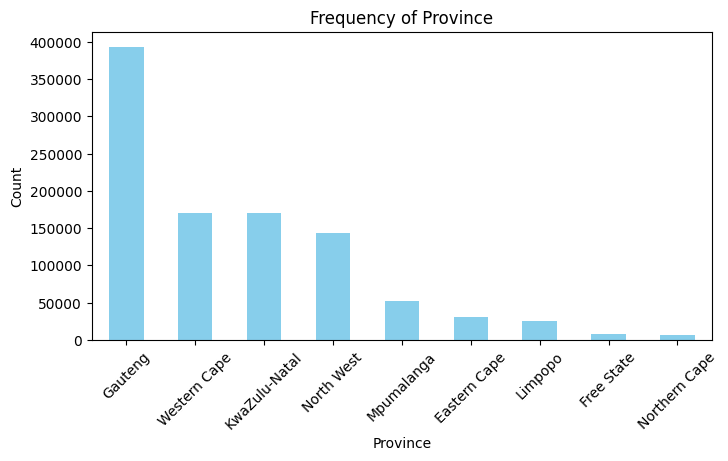

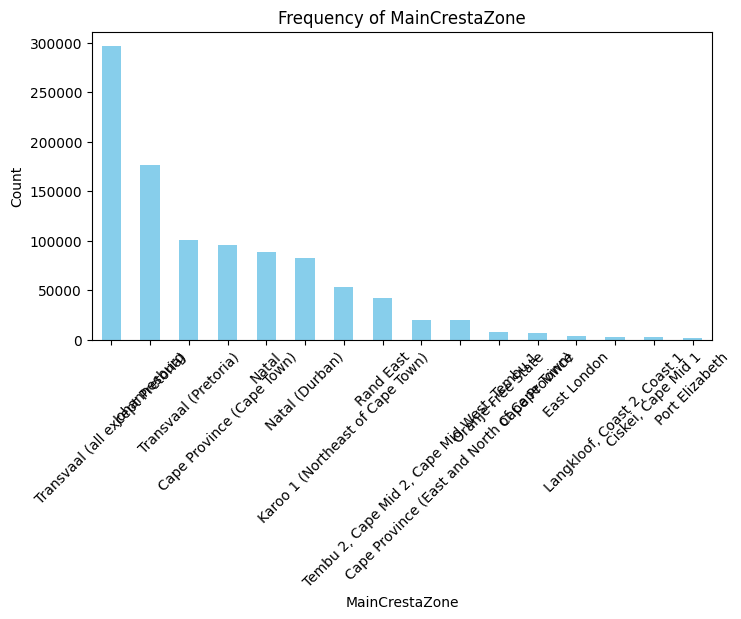

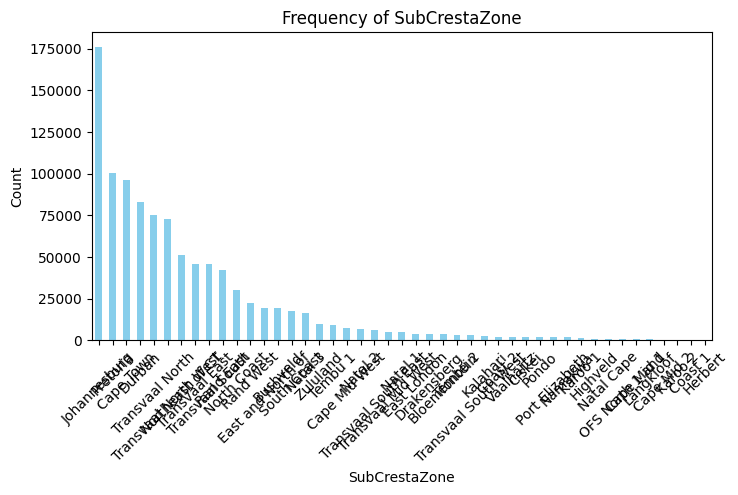

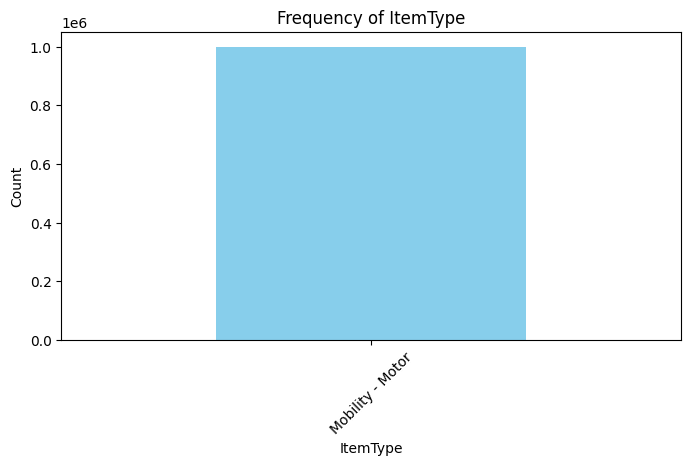

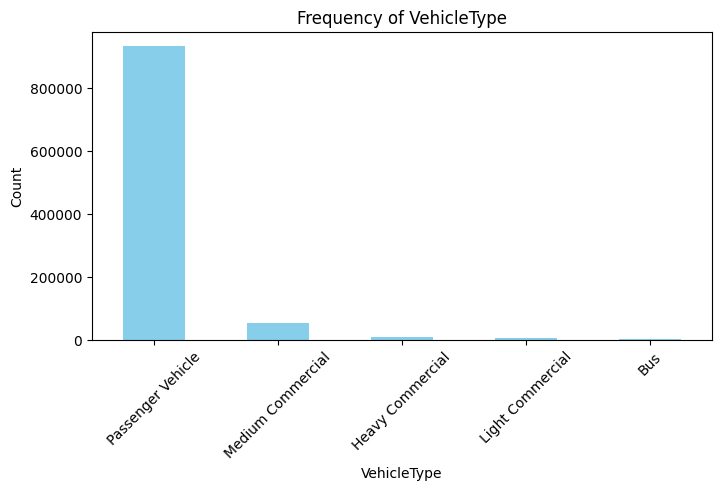

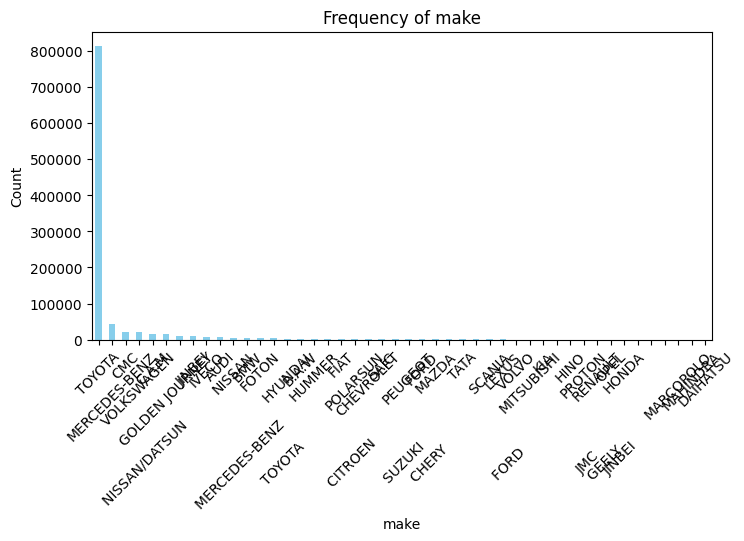

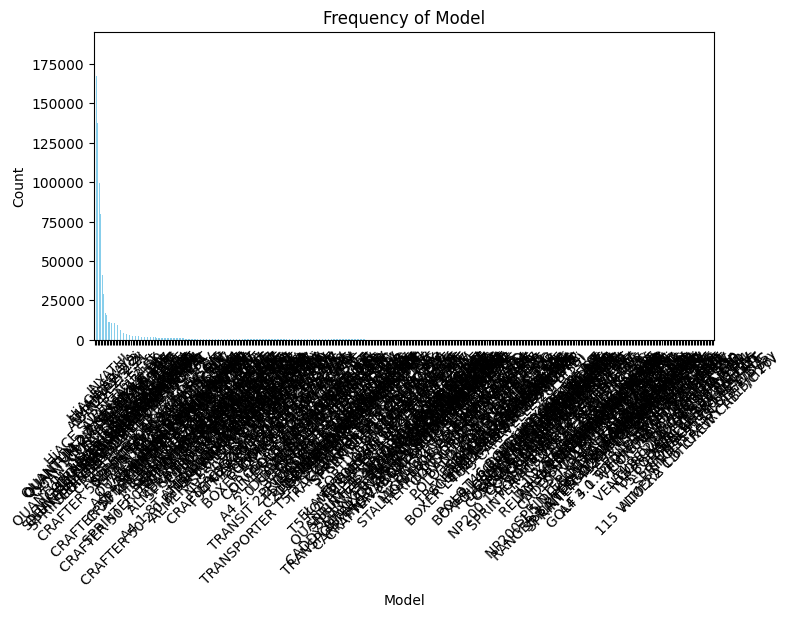

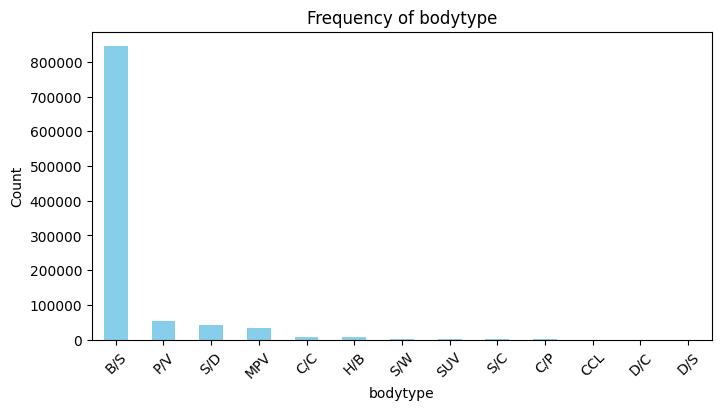

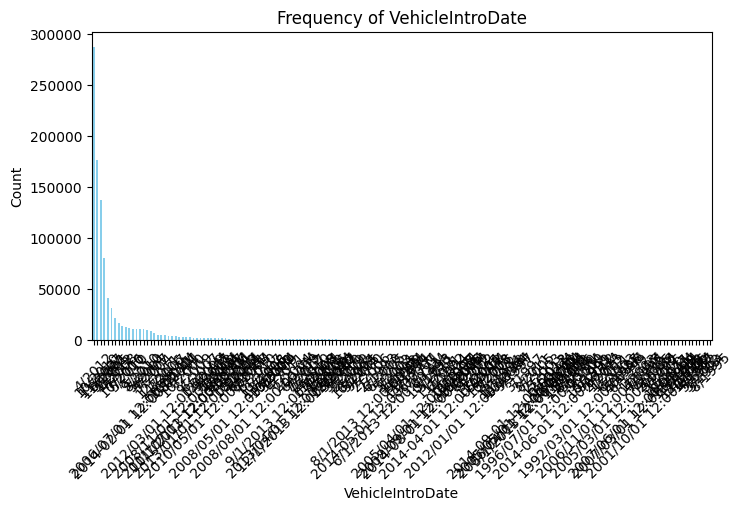

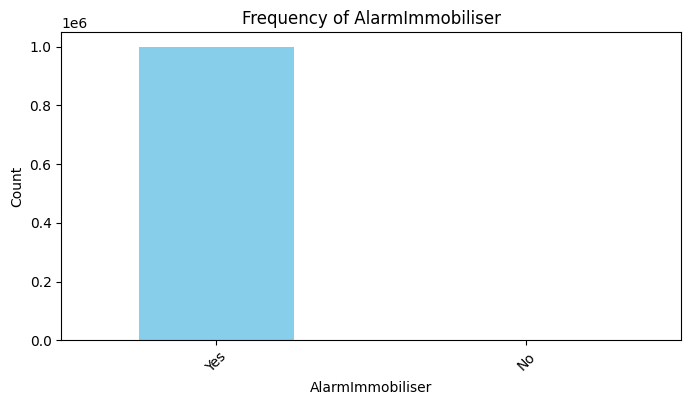

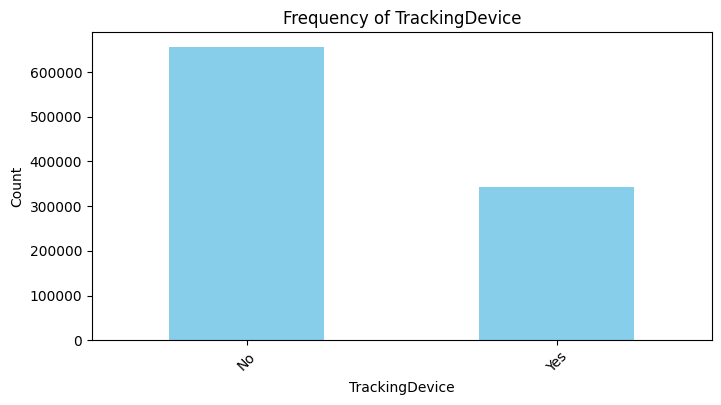

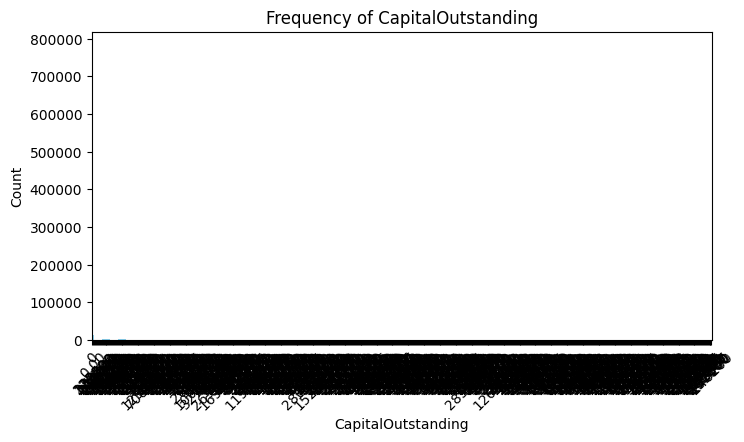

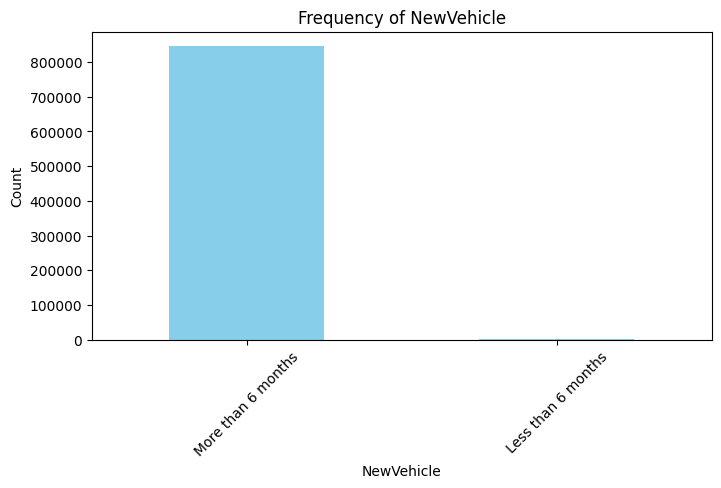

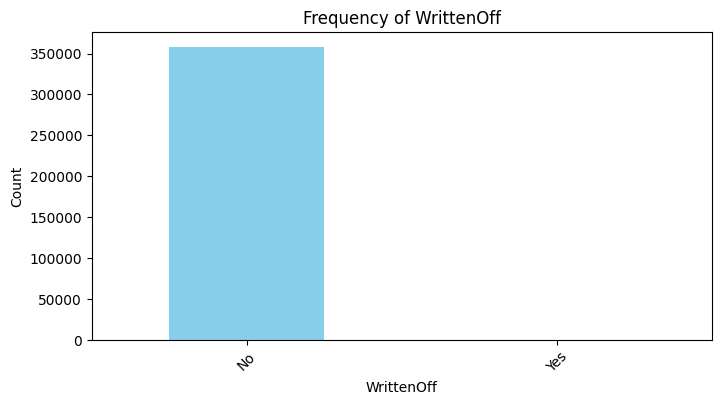

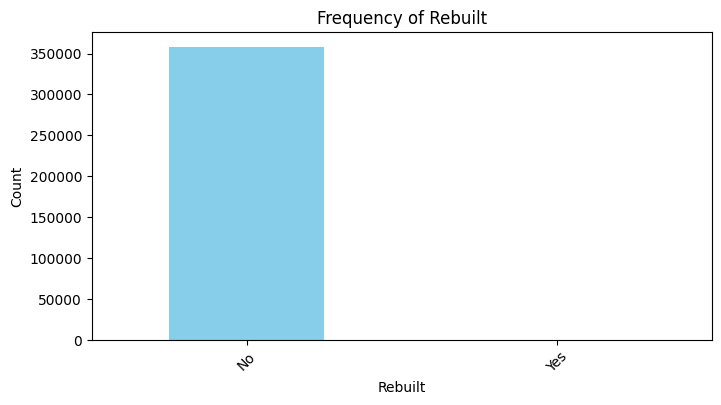

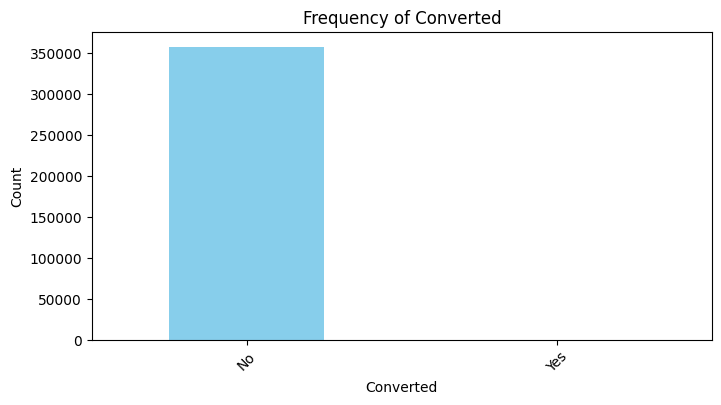

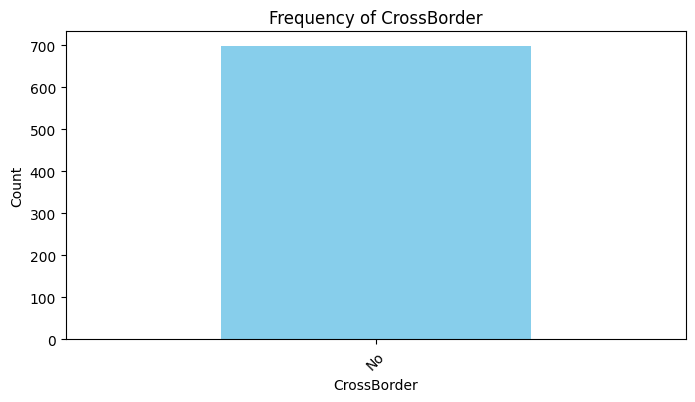

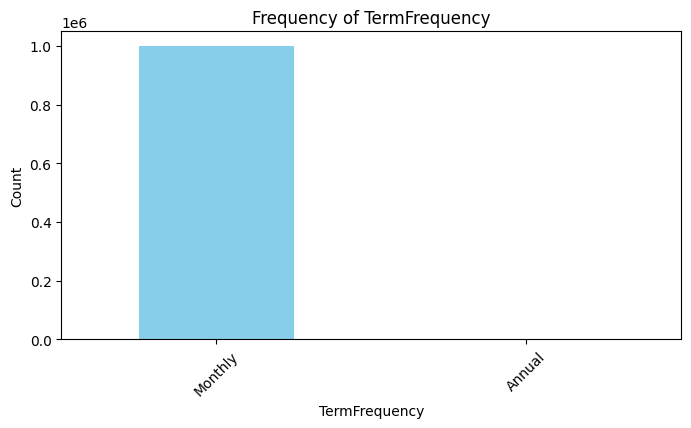

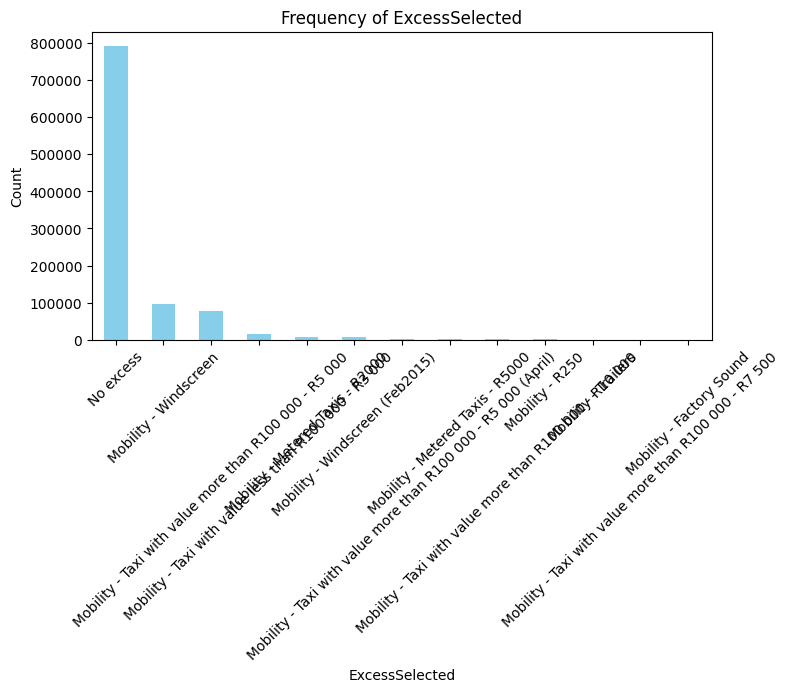

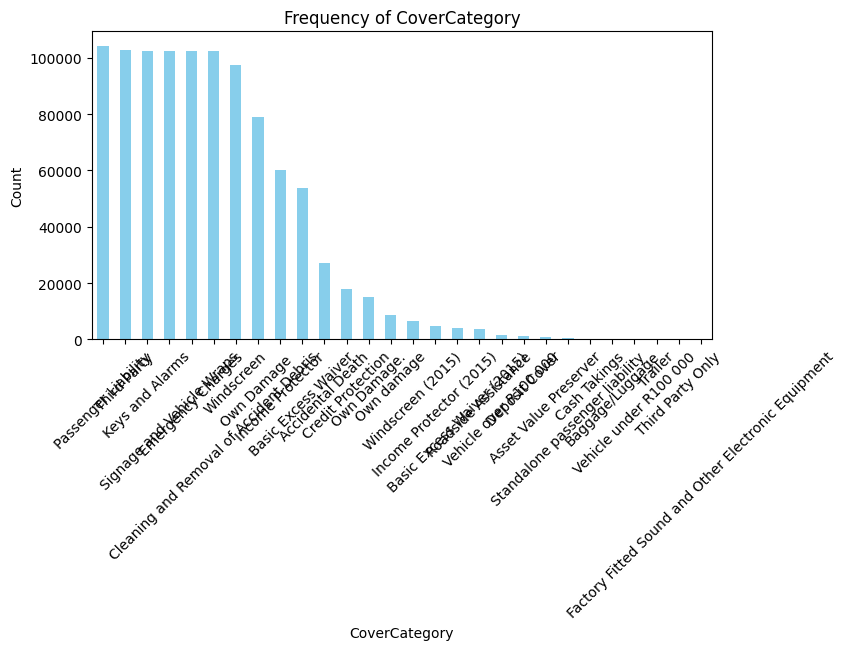

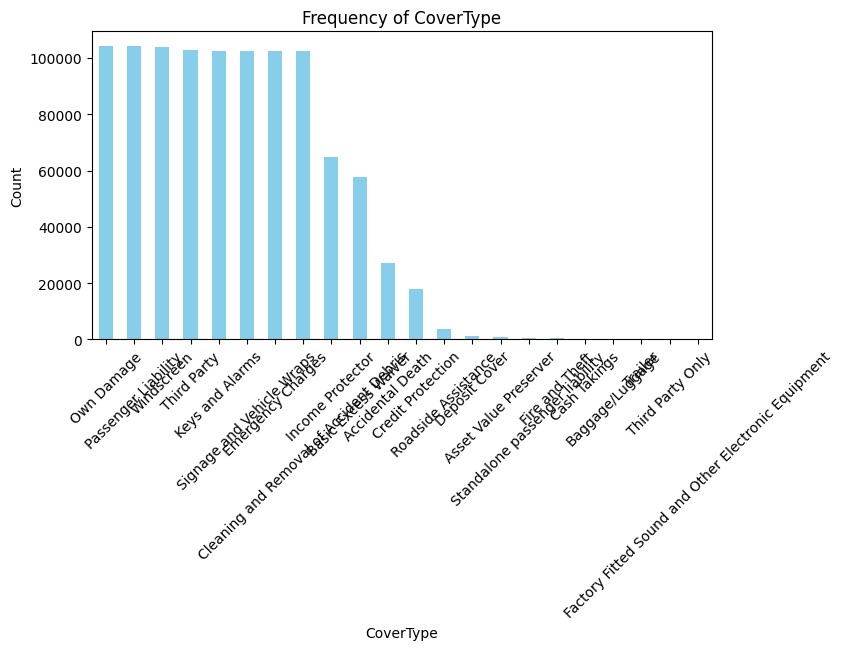

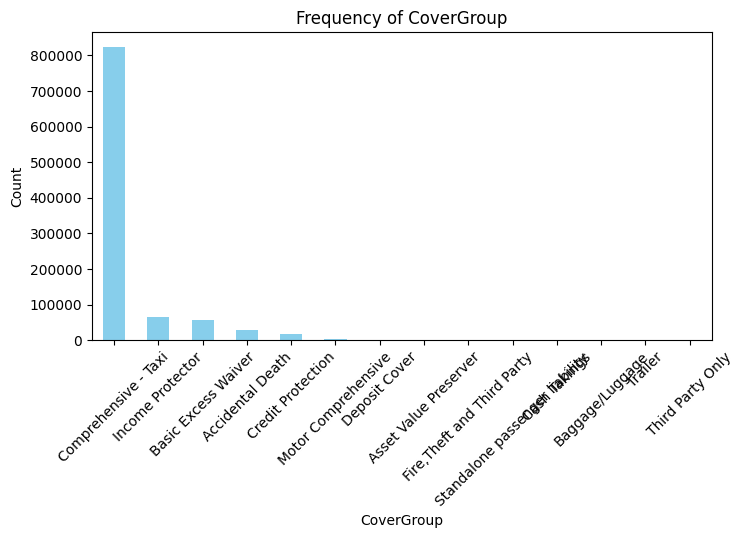

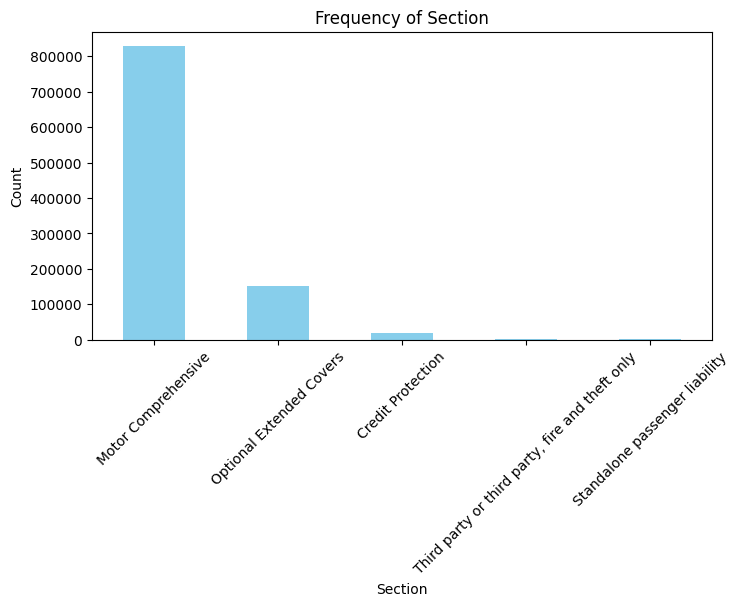

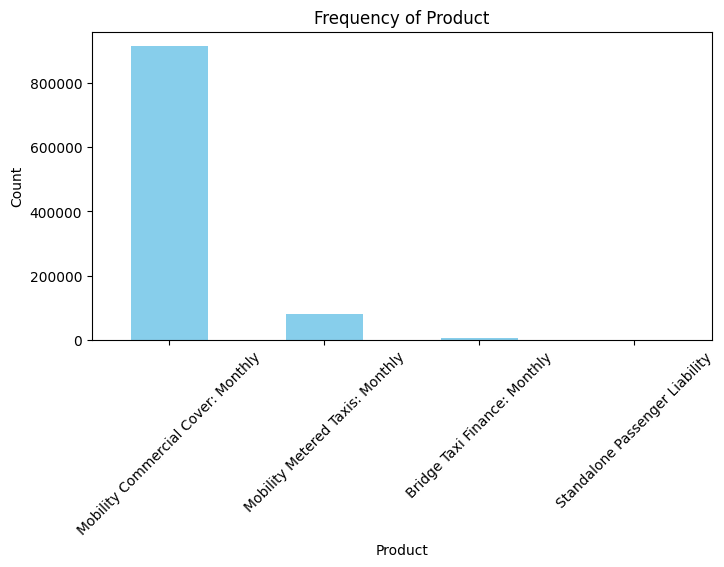

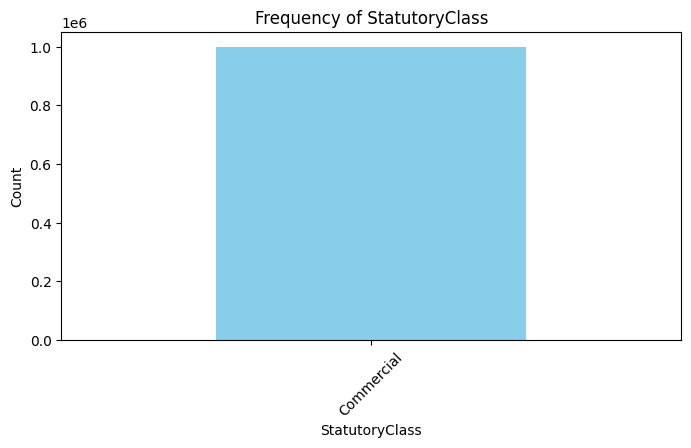

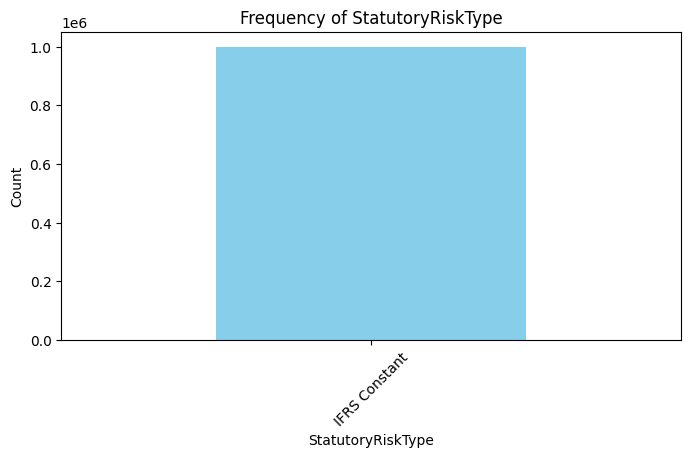

In [6]:
# Select categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Plot bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Frequency of {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


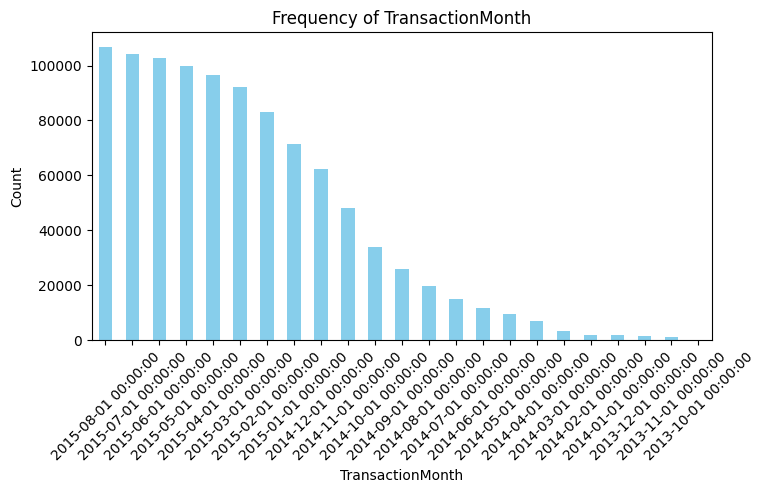

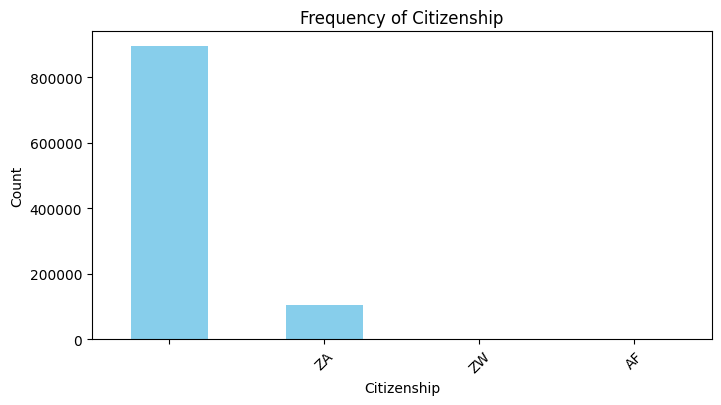

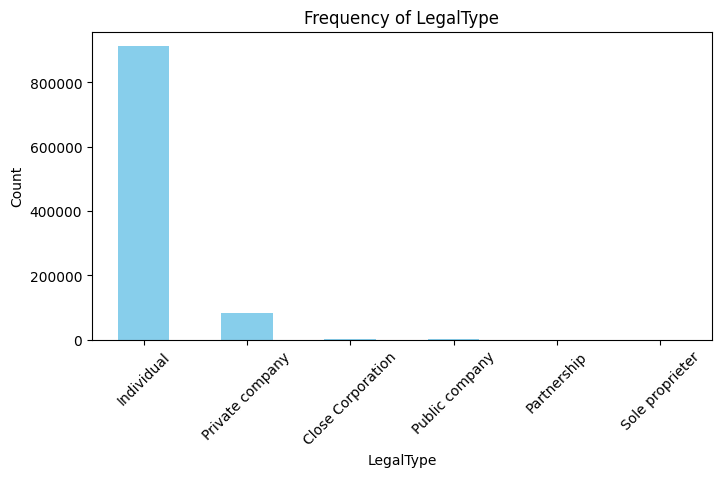

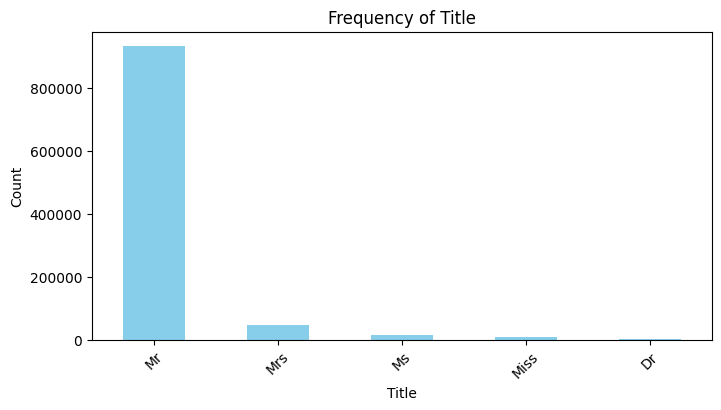

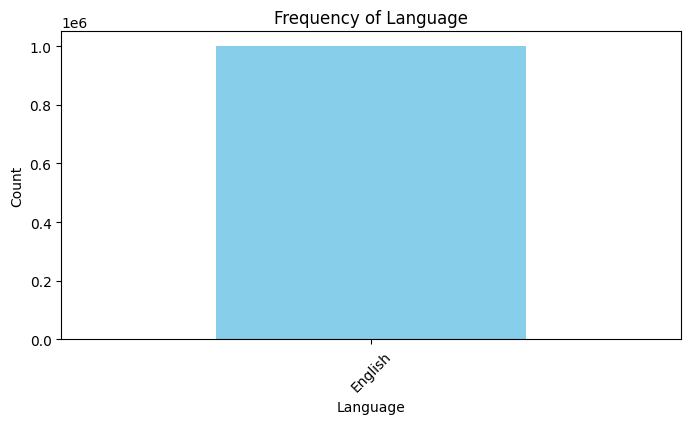

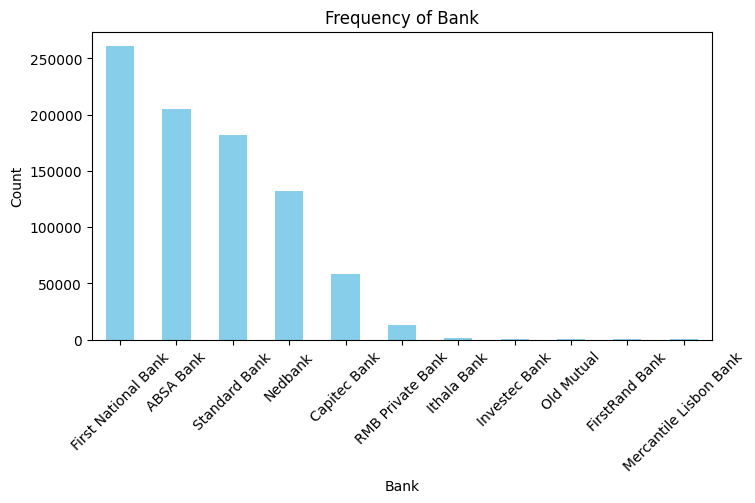

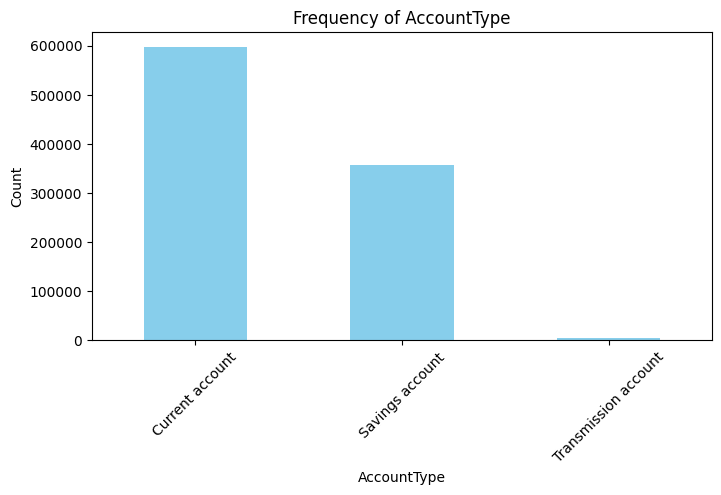

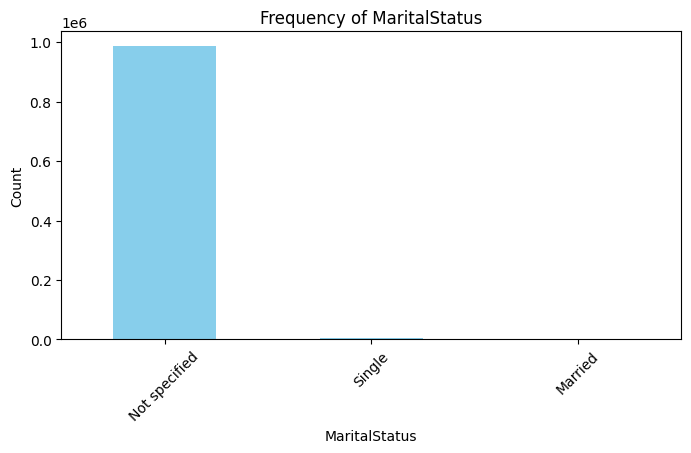

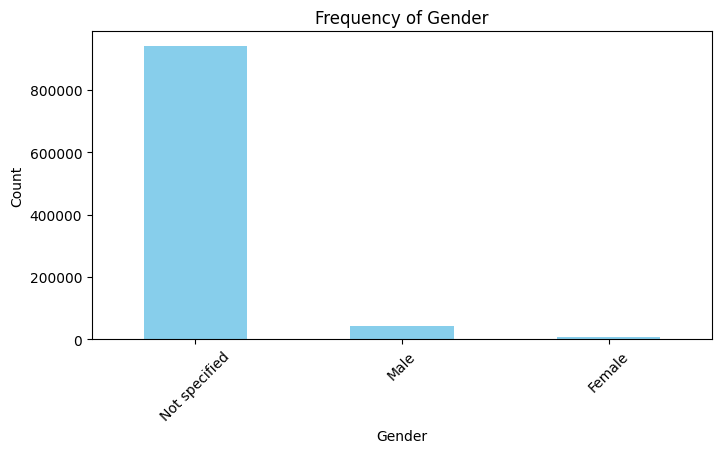

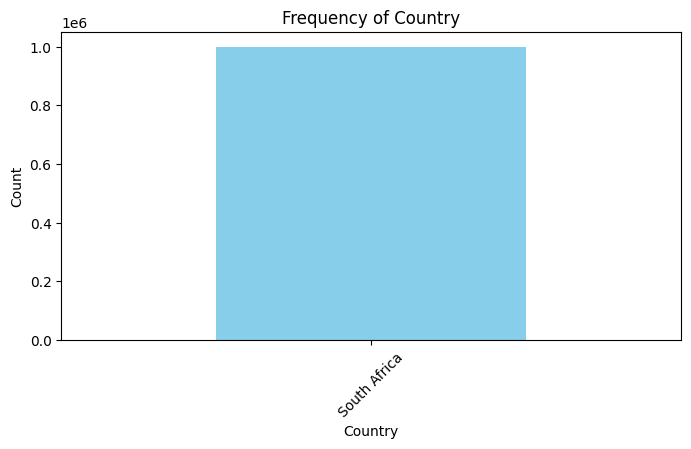

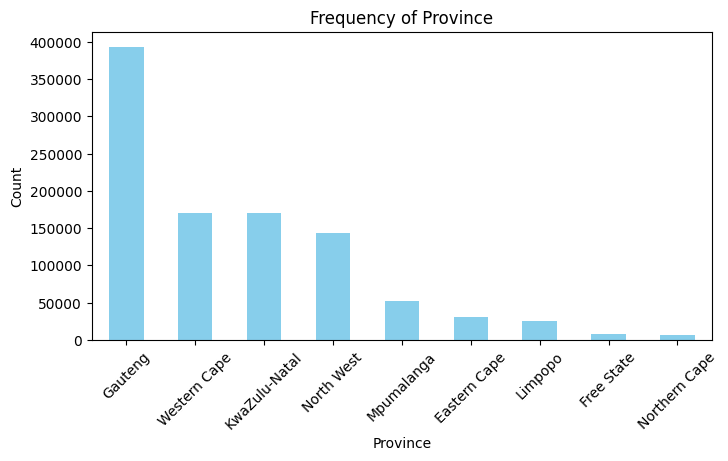

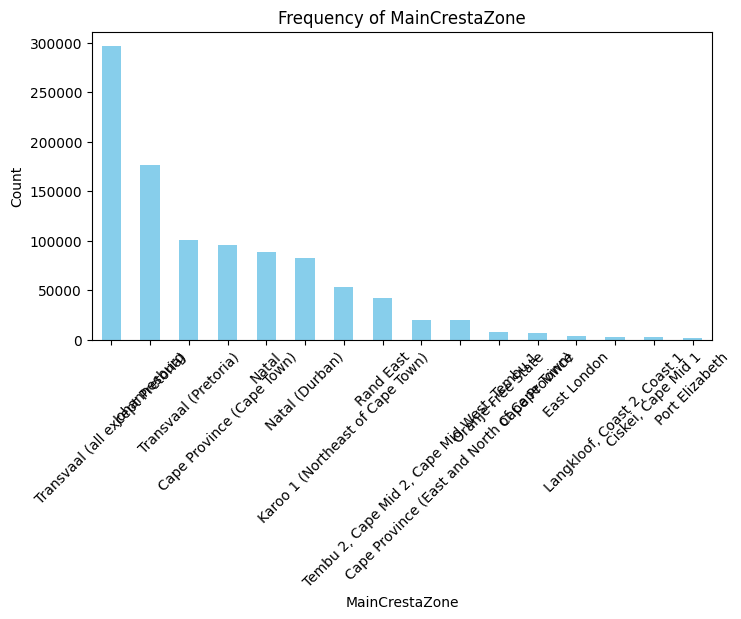

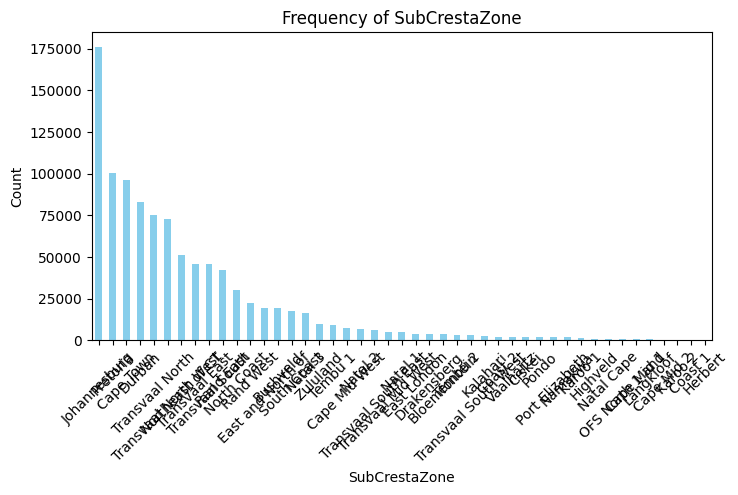

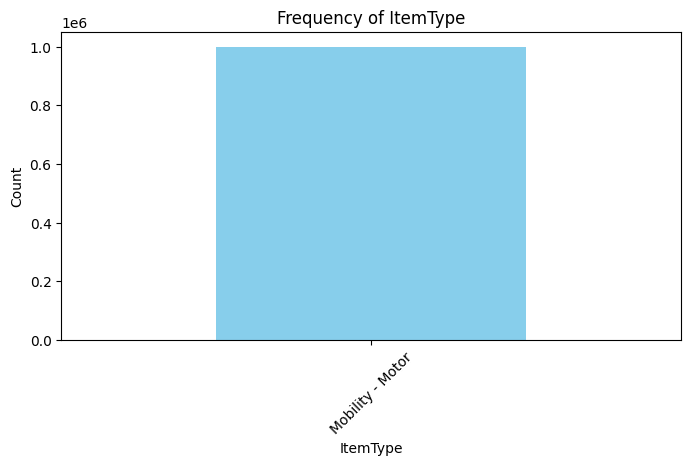

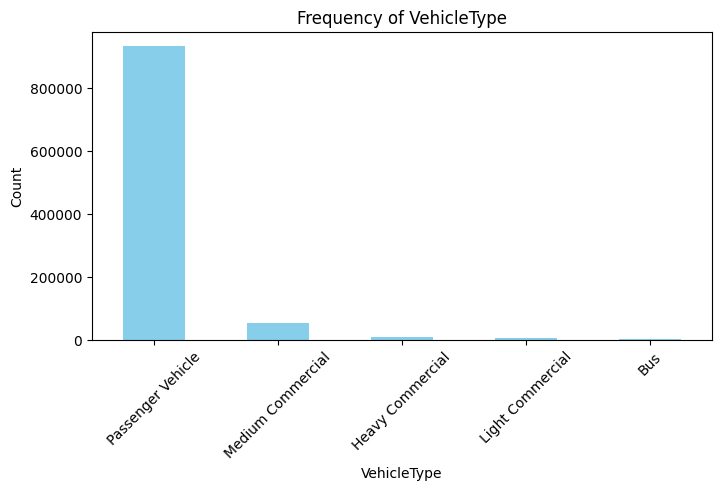

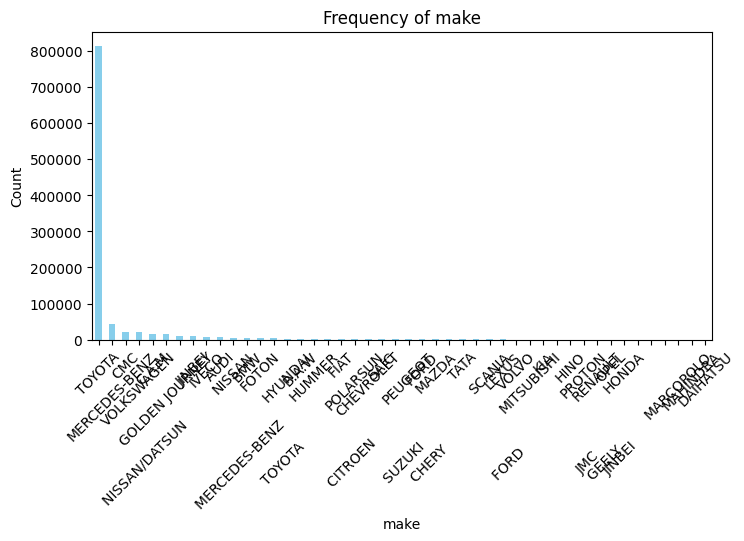

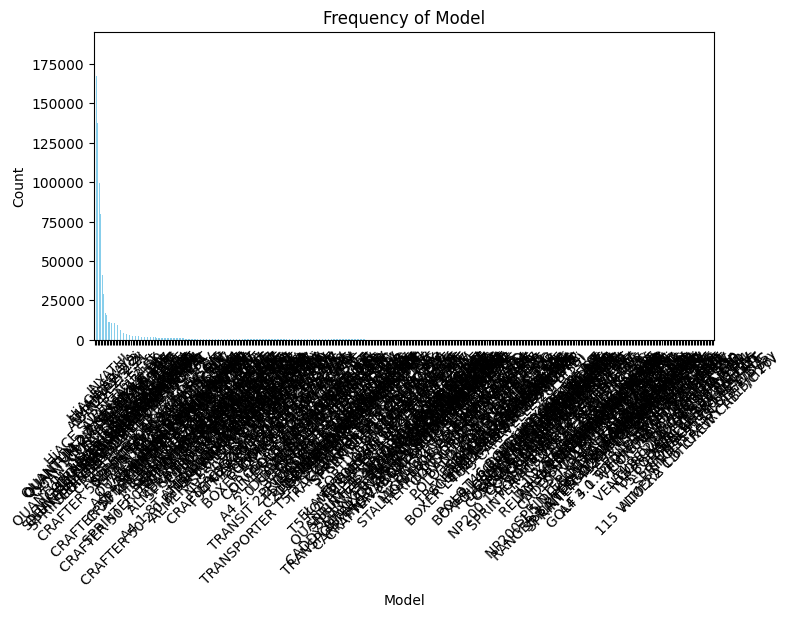

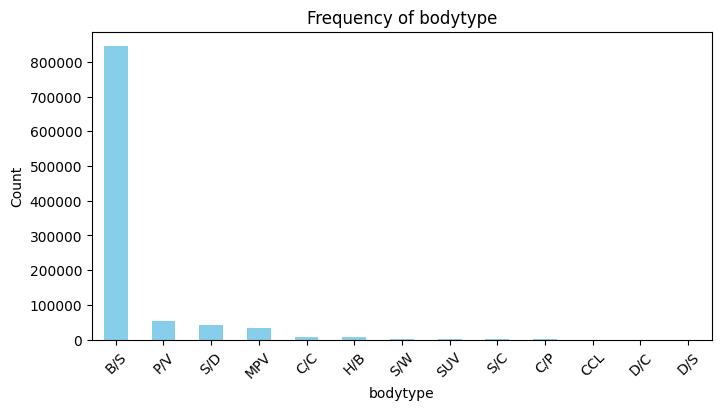

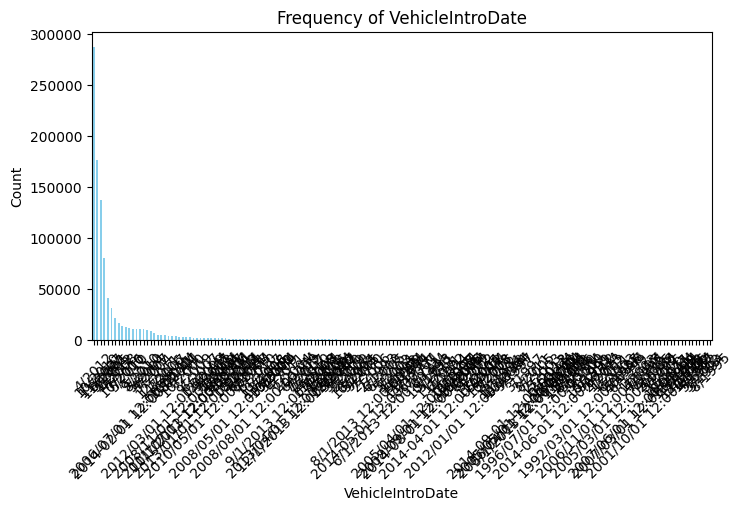

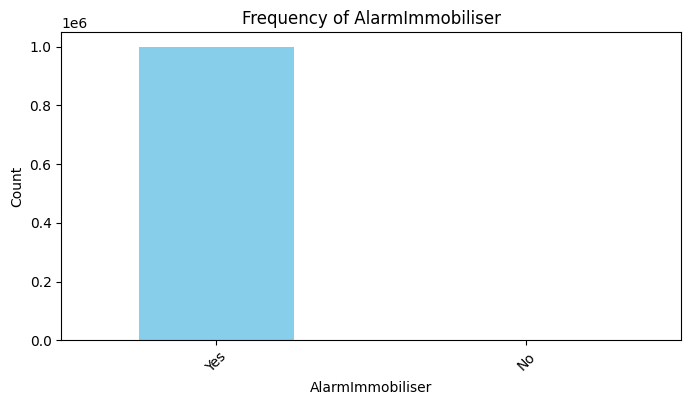

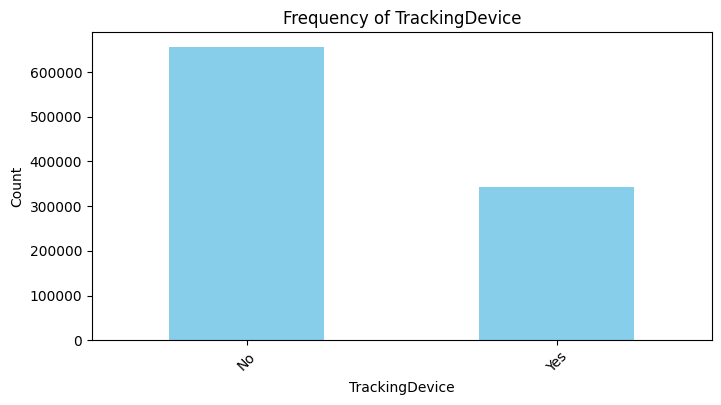

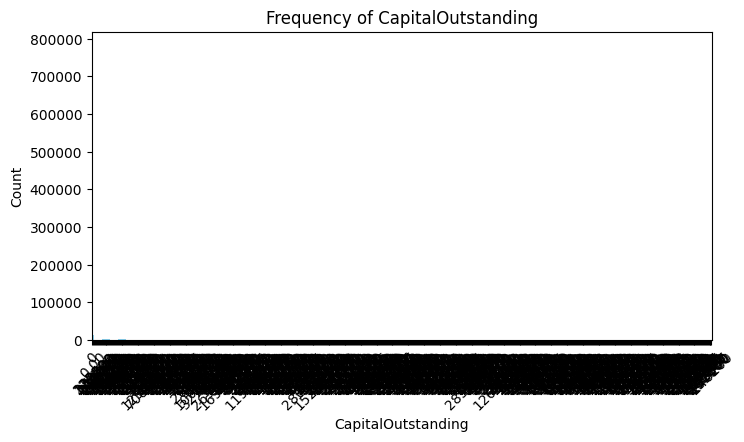

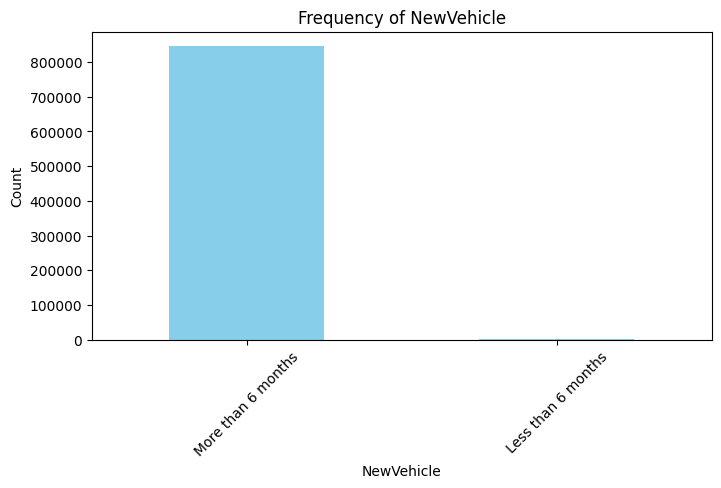

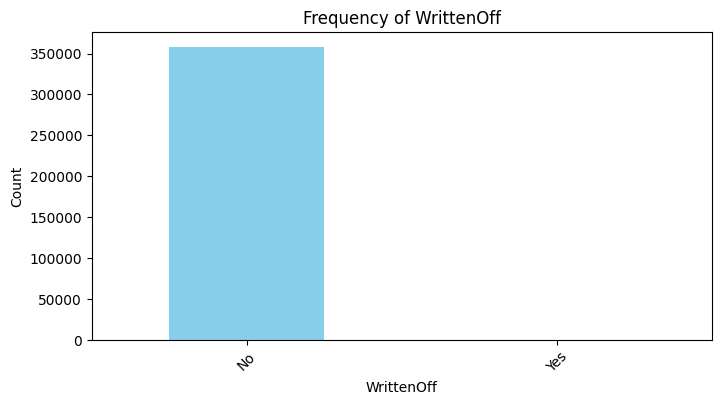

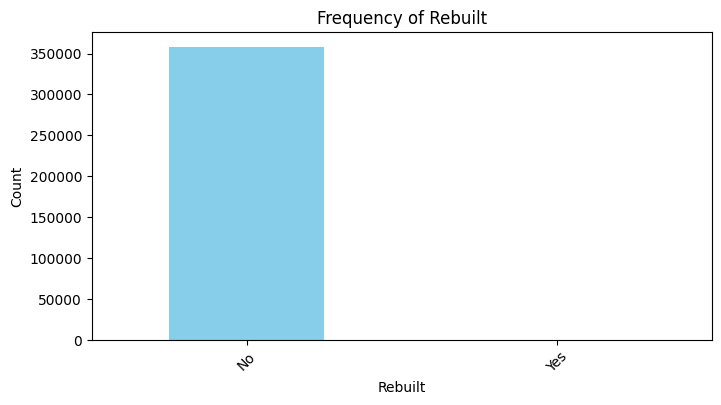

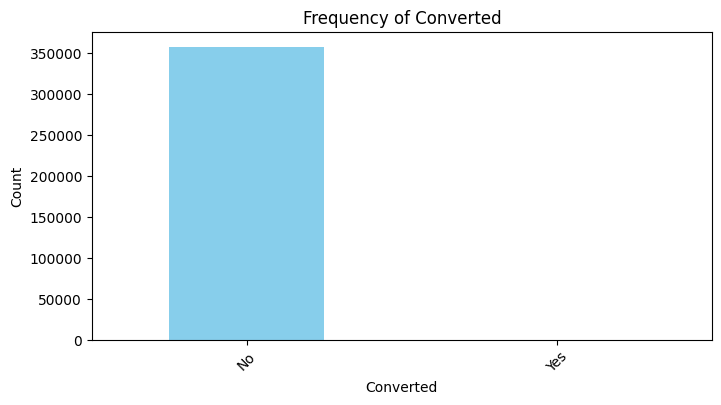

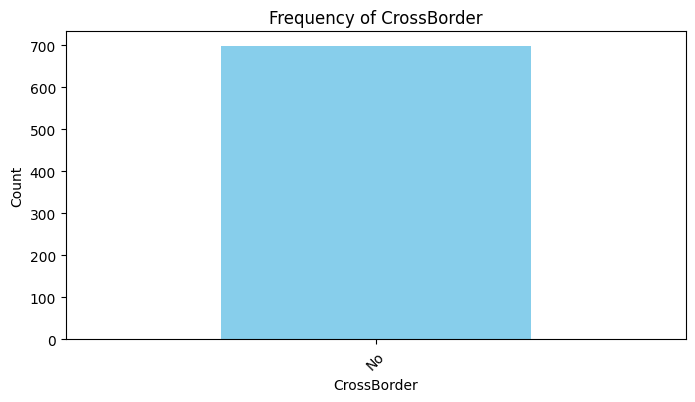

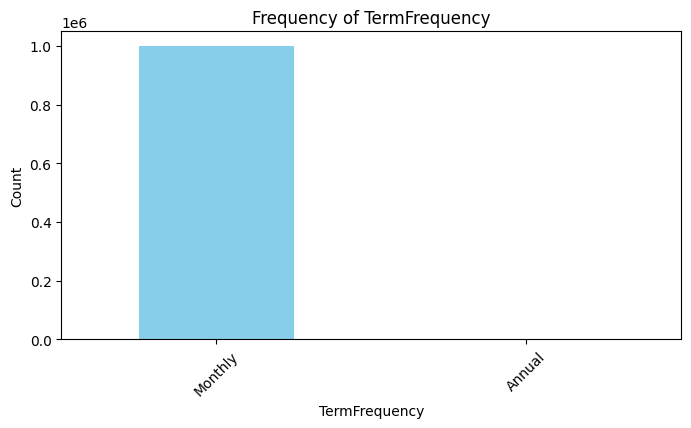

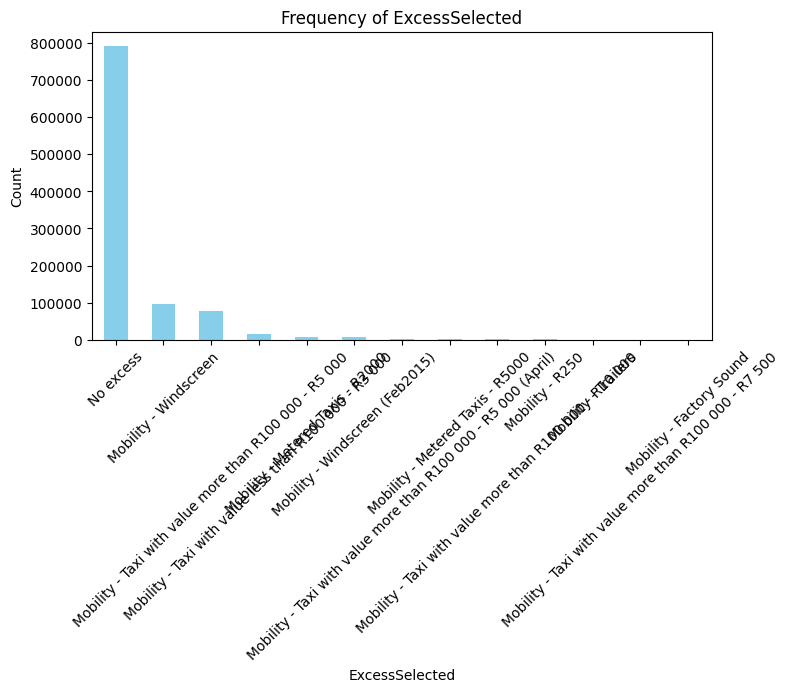

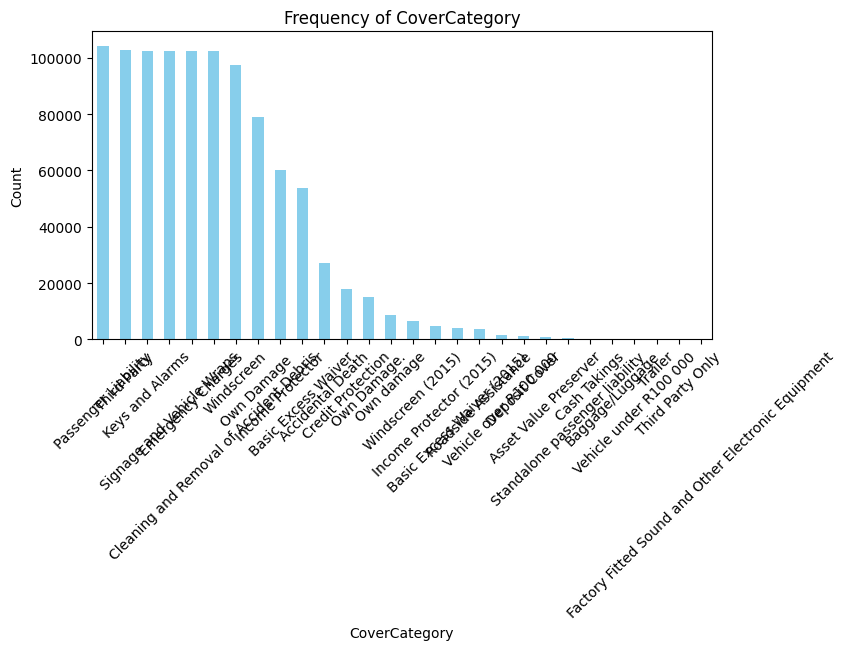

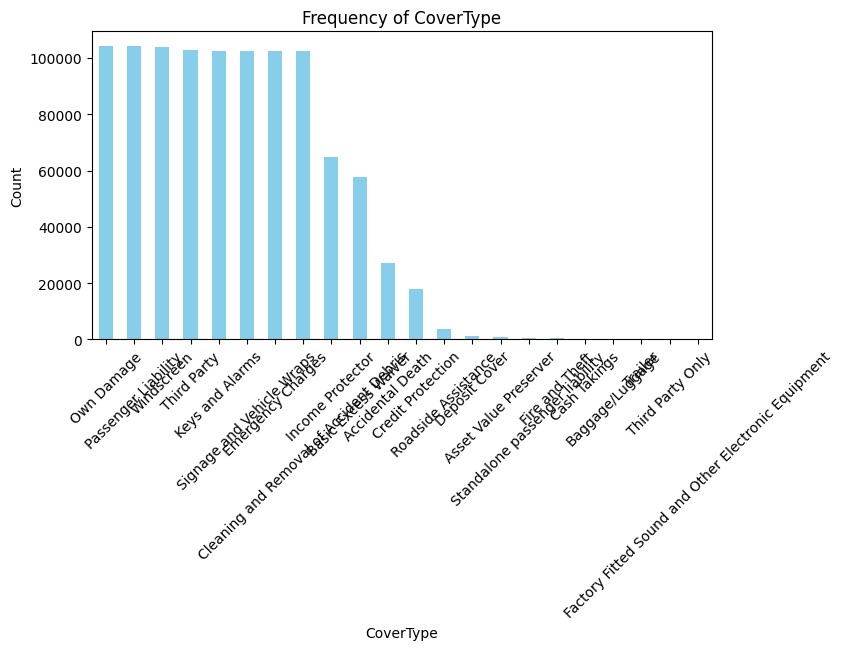

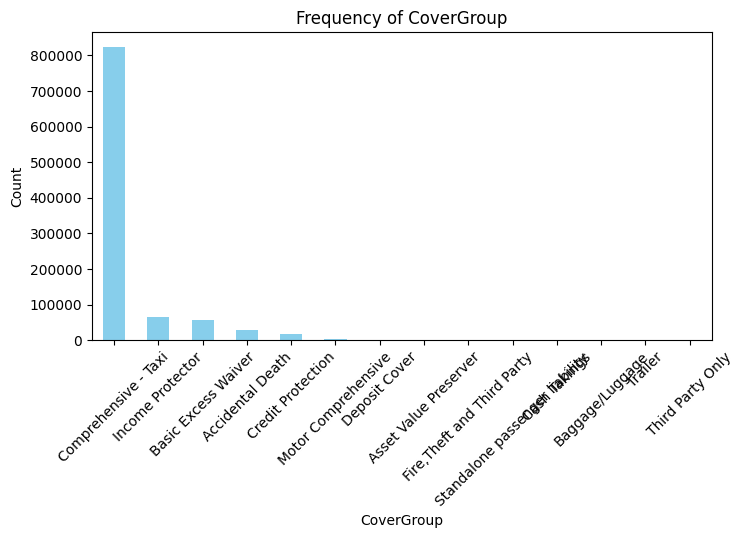

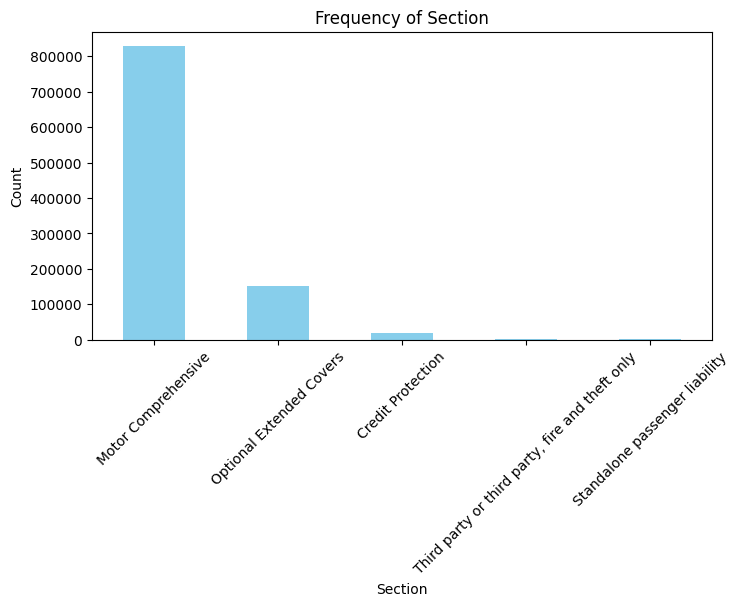

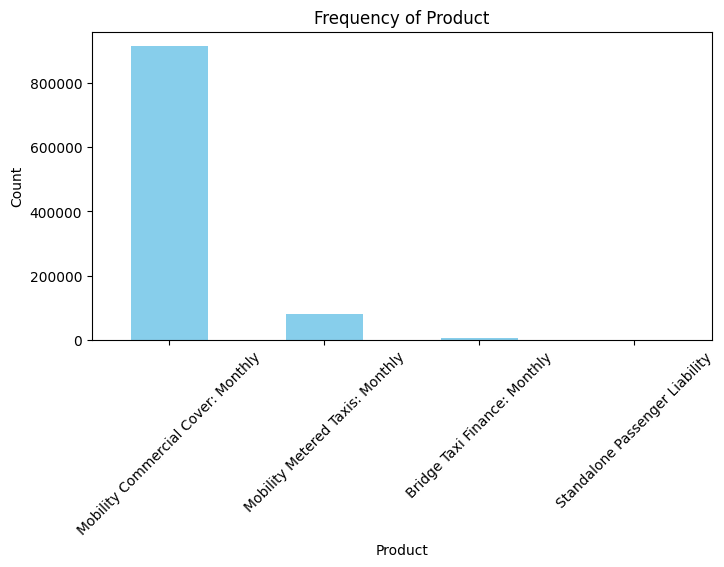

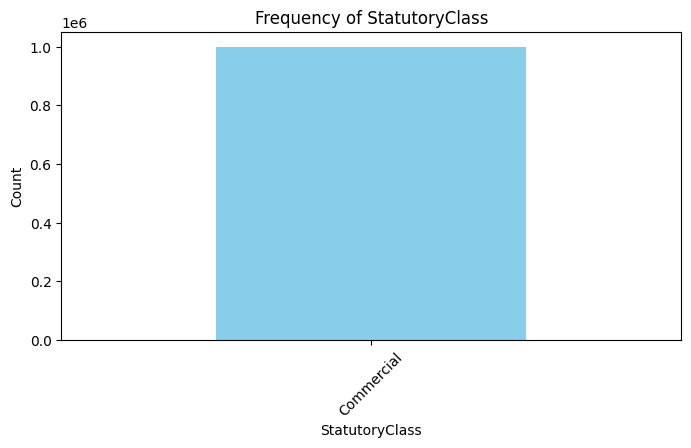

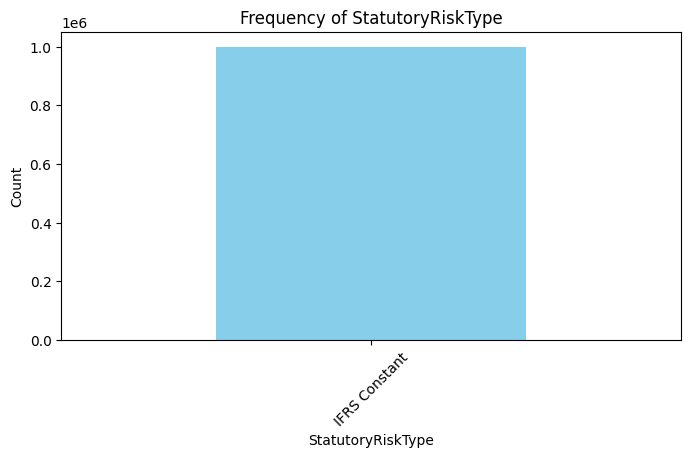

In [7]:
# Select categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Plot bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Frequency of {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


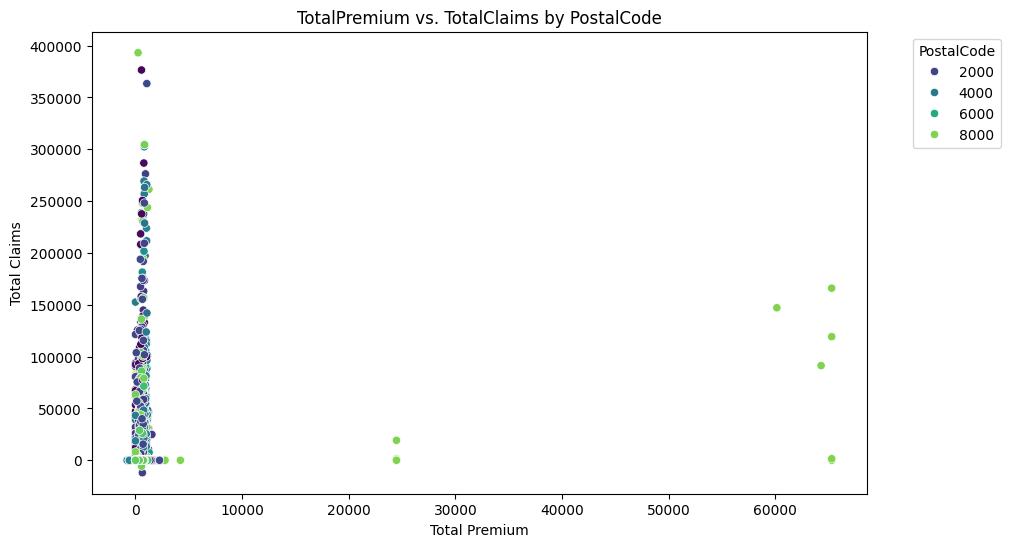

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of TotalPremium vs. TotalClaims colored by PostalCode
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='viridis', data=df)
plt.title("TotalPremium vs. TotalClaims by PostalCode")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


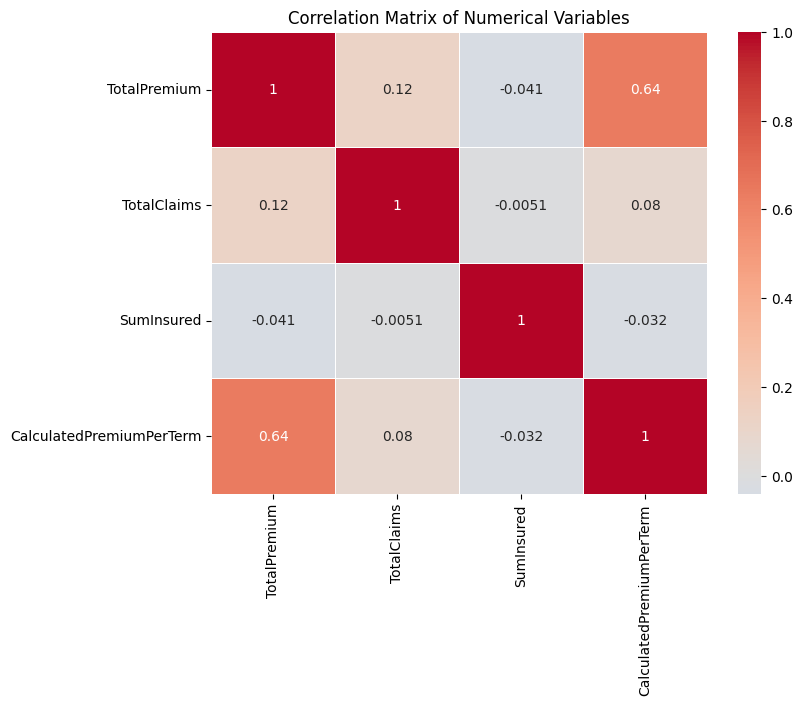

In [9]:
# Calculate correlation matrix for numerical columns
correlation_matrix = df[['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


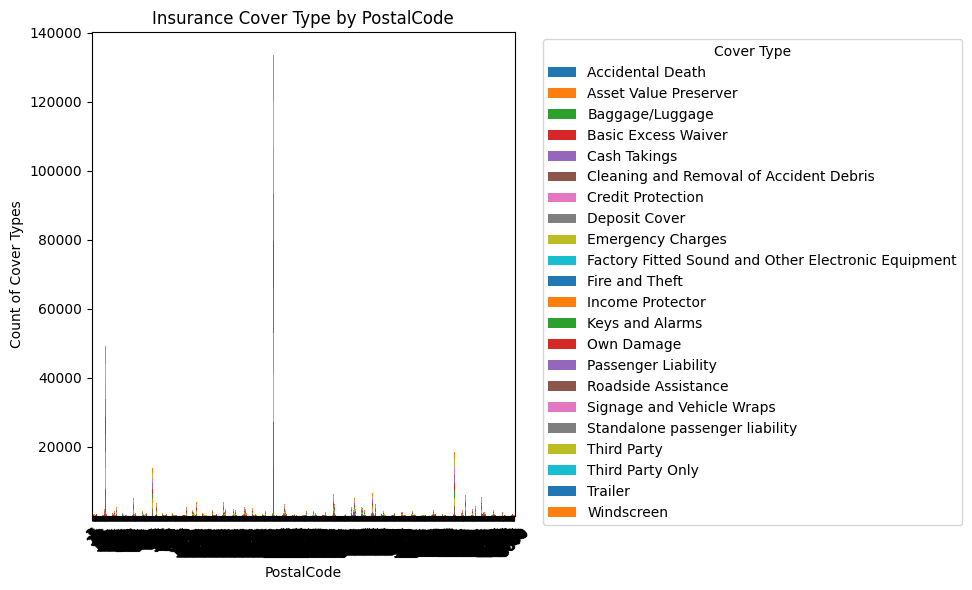

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by PostalCode and CoverType to see the count of each cover type per postal code
cover_type_by_postalcode = df.groupby(['PostalCode', 'CoverType']).size().unstack(fill_value=0)

# Plot the CoverType distribution across PostalCodes
cover_type_by_postalcode.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Insurance Cover Type by PostalCode')
plt.xlabel('PostalCode')
plt.ylabel('Count of Cover Types')
plt.xticks(rotation=45)
plt.legend(title='Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


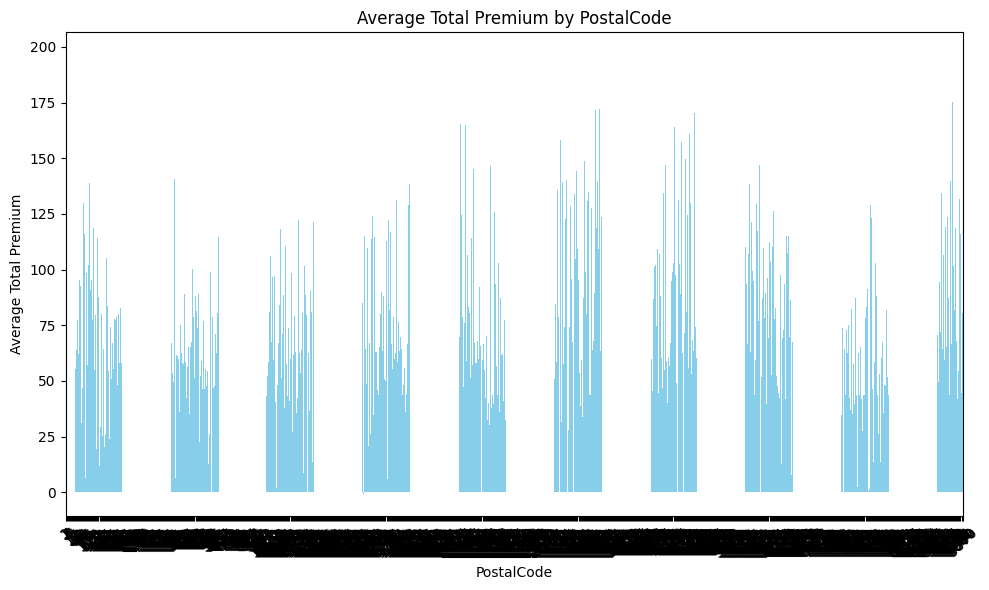

In [11]:
# Group by PostalCode to calculate the average TotalPremium
avg_premium_by_postalcode = df.groupby('PostalCode')['TotalPremium'].mean()

# Plot the average TotalPremium by PostalCode
plt.figure(figsize=(10, 6))
avg_premium_by_postalcode.plot(kind='bar', color='skyblue')
plt.title('Average Total Premium by PostalCode')
plt.xlabel('PostalCode')
plt.ylabel('Average Total Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


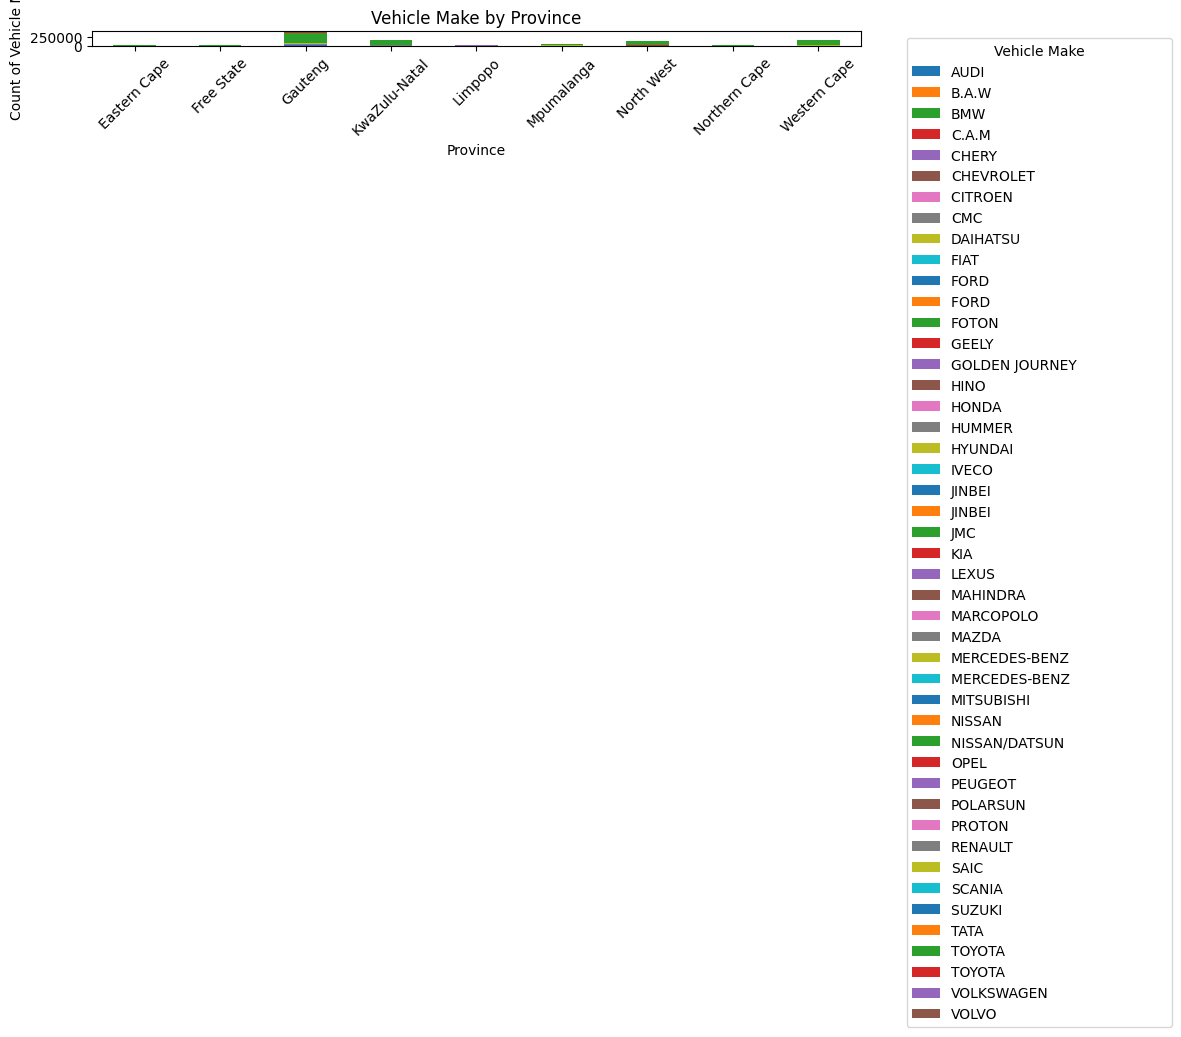

In [12]:
# Group by Province and Auto Make to see the count of each make per province
auto_make_by_province = df.groupby(['Province', 'make']).size().unstack(fill_value=0)

# Plot the Auto Make distribution across Provinces
auto_make_by_province.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Vehicle Make by Province')
plt.xlabel('Province')
plt.ylabel('Count of Vehicle Makes')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\CraftSoft\AppData\Local\Temp\ipykernel_13636\2877432767.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


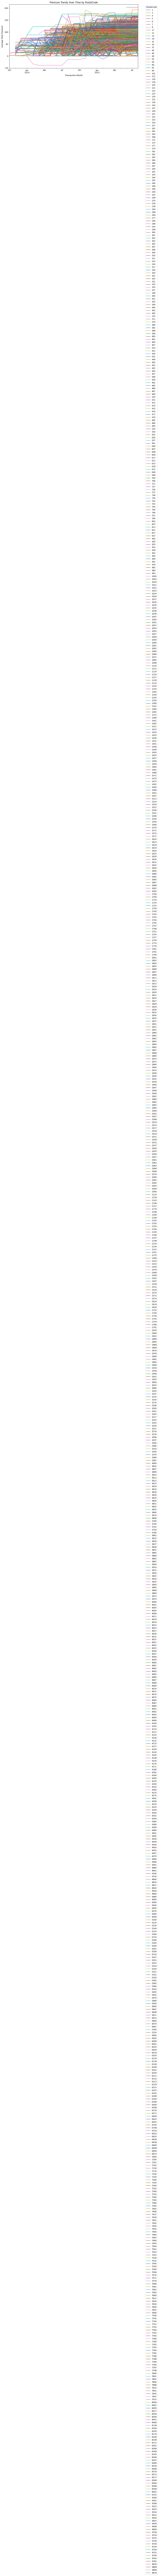

In [13]:
# Ensure that 'TransactionMonth' is a datetime object
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Group by TransactionMonth and PostalCode to calculate average TotalPremium over time
premium_trends_by_postalcode = df.groupby(['TransactionMonth', 'PostalCode'])['TotalPremium'].mean().unstack()

# Plot the trend of TotalPremium over time for different PostalCodes
premium_trends_by_postalcode.plot(figsize=(12, 6))
plt.title('Premium Trends Over Time by PostalCode')
plt.xlabel('Transaction Month')
plt.ylabel('Average Total Premium')
plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


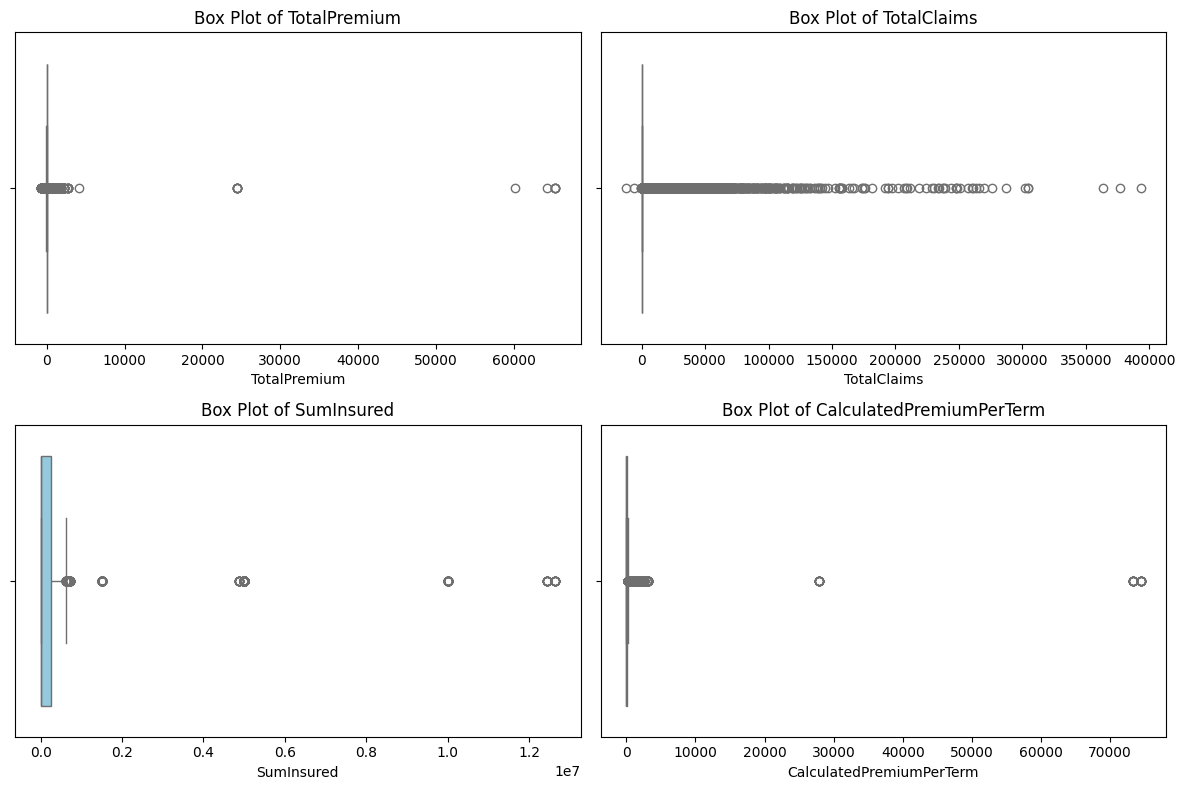

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier detection
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']

# Plot box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


C:\Users\CraftSoft\AppData\Local\Temp\ipykernel_13636\1056037668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_premium_by_covertype.index, y=avg_premium_by_covertype.values, palette='coolwarm')


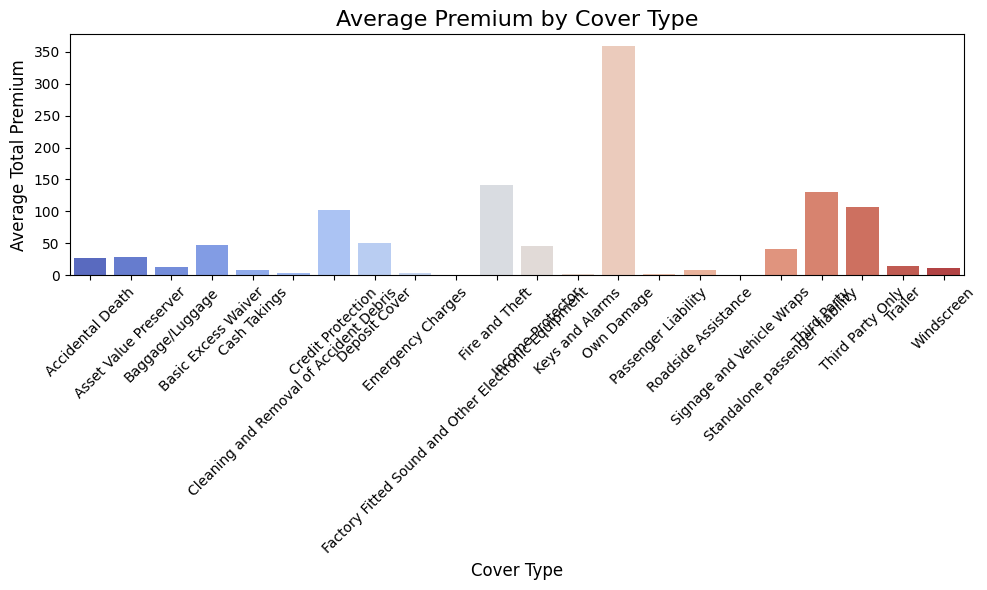

In [15]:
plt.figure(figsize=(10, 6))
avg_premium_by_covertype = df.groupby('CoverType')['TotalPremium'].mean()
sns.barplot(x=avg_premium_by_covertype.index, y=avg_premium_by_covertype.values, palette='coolwarm')
plt.title('Average Premium by Cover Type', fontsize=16)
plt.xlabel('Cover Type', fontsize=12)
plt.ylabel('Average Total Premium', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


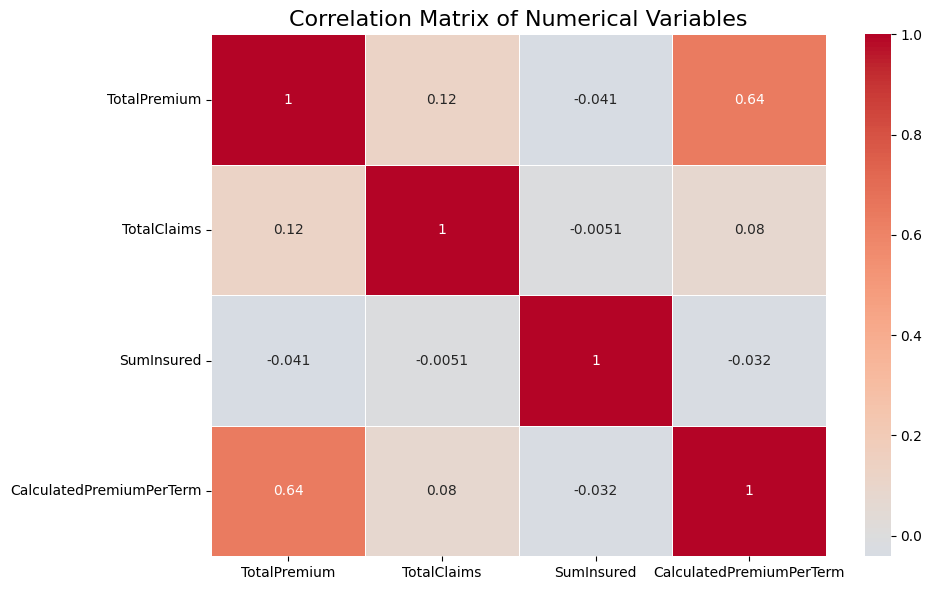

In [16]:
plt.figure(figsize=(10, 6))
corr_matrix = df[['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()
